In [1]:
# p.132 < 3장. 활동 3 : 이진 분류를 하는 단일-레이어 신경망 구축 분류 과업 >

In [2]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

In [3]:
# !는 시스템 명령어 실행하는 것!
# 터미널에서 하는 명령어를 주피터 상에서 실행할 수 있도록 해줌.
!python --version

Python 3.7.6


In [4]:
# 데이터 셋 만들기
# 데이터 분포를 원으로 만드는 것이 가장 좋음!

import matplotlib.patches as mpatches
from sklearn.datasets import make_blobs, make_circles

In [5]:
def plot_data(pl, X, y):
    # y가 0인 애들 중에 x좌표를 보겠다. --> X[y == 0, 0]
    # y가 0인 애들 중에 y좌표를 보겠다. --> X[y == 0, 1]
    # 'ob' -> 원 표시에 blue
    pl.plot(X[y == 0, 0], X[y == 0, 1], 'ob', alpha = 0.5)
    
    # y가 0인 애들 중에 x좌표를 보겠다. --> X[y == 1, 0]
    # y가 0인 애들 중에 y좌표를 보겠다. --> X[y == 1, 1]
    # ,0 은 x, ,1은 y
    # 'xr' x 표시에 red
    pl.plot(X[y == 1, 0], X[y == 1, 1], 'xr', alpha = 0.5)
    
    # 0과 1이 분리가 됨.
    pl.legend(['0', '1'])
    return pl

In [6]:
X, y = make_circles(
    n_samples = 400, 
    factor =0.6,
    noise = 0.1,
    random_state = 42
)

print(y)

# y가 1인 것은 원의 범주에 속했다는 의미
# y가 0에 속한다는 것은 원의 범주에 속하지 못했다는 의미

[1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1
 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0]


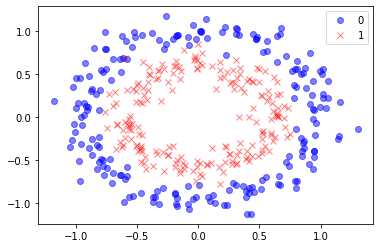

In [7]:
pl = plot_data(plt, X, y)
pl.show()

# 0인 점들(파란색)은 범주에서 벗어나 있고,
# 1인 점들(빨간색)은 원의 범주에 들어가 있음.

In [8]:
# 랜덤값을 설정하기 위해서 seed 값 설정
seed = 1

print("X size =", X.shape) 
print("y size =", y.shape)
print("Num of Samples =", X.shape[0])

X size = (400, 2)
y size = (400,)
Num of Samples = 400


In [9]:
# 왜 X size가 400, 2일까?
# 400 : Sample의 개수
#   2 : 2차원의 정보 (원에 대한 정보니까 X, y 좌표가 필요하기 때문!)

print(X)
# 데이터 400개 있는데 그 안에 2차원 정보가 있음 (원에 대한 정보니까 X, y 좌표 정보가 필요하기 때문)
# 실제 구동되는 레이더 정보라면 X, y, Z로 3차원 정보로 들어올 것임. -> 전자기파니까 전압정보로 들어옴

[[ 5.22047667e-01  2.45076964e-01]
 [-4.90174568e-01  4.04540597e-01]
 [ 4.69901235e-01  9.04544287e-01]
 [ 7.37010889e-01  1.11486553e-01]
 [-9.86636209e-01  1.69521513e-01]
 [-7.17008501e-01  4.38359514e-01]
 [-4.41013452e-01 -5.31920699e-01]
 [-9.95858989e-01  1.08030813e-01]
 [-3.25897203e-01  5.41504194e-01]
 [-6.96094447e-01 -6.45797770e-01]
 [ 9.28358178e-01  2.58529455e-01]
 [ 2.30348927e-01 -3.40047801e-01]
 [-2.66141506e-01  1.17464969e+00]
 [-7.55781307e-01  7.93410286e-01]
 [-5.69765424e-01 -9.25855019e-01]
 [ 3.18599125e-01  1.02857282e+00]
 [-5.10432759e-01  1.73074993e-01]
 [ 3.95376430e-01 -3.96807852e-01]
 [ 3.37431388e-01  5.71841873e-01]
 [ 7.27958177e-01 -2.31006816e-01]
 [-6.93334233e-01  6.76130038e-01]
 [ 1.00825010e+00  5.07130501e-01]
 [ 6.51086779e-01  1.35010193e-02]
 [-3.45045802e-01  4.46996781e-01]
 [ 1.04462893e+00  1.13624232e-01]
 [ 6.45411496e-01  3.08639177e-02]
 [-9.71724535e-01 -5.12587714e-01]
 [ 3.69760307e-01  2.97525839e-01]
 [-2.09844774e-01  5

In [10]:
# 뉴럴 네트워크 만들어봐야함.
# 원 추정할 수 있도록!

from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)
model = Sequential()

In [11]:
model.add(Dense(1, activation = 'sigmoid', input_dim = 2)) # 바로 sigmoid로 가보자.
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy')

In [12]:
# y = f(x) 해주는 작업!

model.fit(X,y, batch_size = 5, epochs = 100, verbose = 1)
# 100번 반복

# 정확성이 30%정도밖에 안됨 (loss가 어마어마 함)

Epoch 1/100
80/80 [==============================] - 0s 483us/step - loss: 0.7934
Epoch 2/100
80/80 [==============================] - 0s 463us/step - loss: 0.7825
Epoch 3/100
80/80 [==============================] - 0s 468us/step - loss: 0.7725
Epoch 4/100
80/80 [==============================] - 0s 458us/step - loss: 0.7636
Epoch 5/100
80/80 [==============================] - 0s 426us/step - loss: 0.7556
Epoch 6/100
80/80 [==============================] - 0s 480us/step - loss: 0.7484
Epoch 7/100
80/80 [==============================] - 0s 456us/step - loss: 0.7419
Epoch 8/100
80/80 [==============================] - 0s 494us/step - loss: 0.7361
Epoch 9/100
80/80 [==============================] - 0s 495us/step - loss: 0.7311
Epoch 10/100
80/80 [==============================] - 0s 443us/step - loss: 0.7266
Epoch 11/100
80/80 [==============================] - 0s 470us/step - loss: 0.7225
Epoch 12/100
80/80 [==============================] - 0s 463us/step - loss: 0.7191
Epoch 13/100


80/80 [==============================] - 0s 474us/step - loss: 0.6935
Epoch 100/100
80/80 [==============================] - 0s 461us/step - loss: 0.6935


In [13]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)

In [14]:
help(np.meshgrid)

Help on function meshgrid in module numpy:

meshgrid(*xi, **kwargs)
    Return coordinate matrices from coordinate vectors.
    
    Make N-D coordinate arrays for vectorized evaluations of
    N-D scalar/vector fields over N-D grids, given
    one-dimensional coordinate arrays x1, x2,..., xn.
    
    .. versionchanged:: 1.9
       1-D and 0-D cases are allowed.
    
    Parameters
    ----------
    x1, x2,..., xn : array_like
        1-D arrays representing the coordinates of a grid.
    indexing : {'xy', 'ij'}, optional
        Cartesian ('xy', default) or matrix ('ij') indexing of output.
        See Notes for more details.
    
        .. versionadded:: 1.7.0
    sparse : bool, optional
        If True a sparse grid is returned in order to conserve memory.
        Default is False.
    
        .. versionadded:: 1.7.0
    copy : bool, optional
        If False, a view into the original arrays are returned in order to
        conserve memory.  Default is True.  Please note that
  

In [15]:
help(matplotlib.pyplot.contourf)

Help on function contourf in module matplotlib.pyplot:

contourf(*args, data=None, **kwargs)
    Plot contours.
    
    Call signature::
    
        contour([X, Y,] Z, [levels], **kwargs)
    
    `.contour` and `.contourf` draw contour lines and filled contours,
    respectively.  Except as noted, function signatures and return values
    are the same for both versions.
    
    Parameters
    ----------
    X, Y : array-like, optional
        The coordinates of the values in *Z*.
    
        *X* and *Y* must both be 2-D with the same shape as *Z* (e.g.
        created via `numpy.meshgrid`), or they must both be 1-D such
        that ``len(X) == M`` is the number of columns in *Z* and
        ``len(Y) == N`` is the number of rows in *Z*.
    
        If not given, they are assumed to be integer indices, i.e.
        ``X = range(M)``, ``Y = range(N)``.
    
    Z : array-like(N, M)
        The height values over which the contour is drawn.
    
    levels : int or array-like, option

In [20]:
# 어떤 것이 참이고 거짓인지 판정할 수 있는 바운더리를 만들어 주는 것이 필요함
# 바운더리 plot을 그려주기!
# decision_boundary는 무엇인가??
# 그래프에서 보면 대각선 형태로 쳐져있는 것이 있음.

def plot_decision_bound(model, X, y):
    # X shape --> (400, 2)
    # a = x, b = y (X안에서)

    # X.min(axis = 0) - 0.1의 의미는 현재 x값에서 0.1을 뺀 것을 amin, bmin으로 잡는 것
    # 최소값, 최대값을 받아와서 범위를 만드는 것.
    
    # 원의 방정식은 x^2 + y^2 = r^2
    # 원을 그렸을 때, 원에서 0.2 범위 내에 들어있는 애들을 빗금으로 표시한 것이라고 할 수 있음 (정확히는 조금 다름!)
    amin, bmin = X.min(axis = 0) - 0.1 
    amax, bmax = X.max(axis = 0) + 0.1
    # 위의 작업은 사각형을 만들어주기 위함!!
    
    print("amin = ", amin)
    print("bmin = ", bmin)
    print("amax = ", amax)
    print("bmax = ", bmax)
    
    
    
    # np.linspace()는 첫번째 인자 ~ 두번째 인자 사이의 값을 세번째 인자의 개수만큼 균일하게 쪼갠다.
    # amin과 amax의 범주를 101개 쪼갠다.
    
    # hticks 풀이
    # amin =  -1.2816529526885447 / amax =  1.405132554307814
    # 이 둘의 사이는 약 2.7 간격을 100개의 구간으로 나누면 0.027정도 나옴
    # print(hticks) 해보면  0.027씩 증가함을 알 수 있음.
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    # print(hticks)
    

    # np.meshgrid()는 빗금 그어주는 역할
    # 가로축(x축 정보 - 벡터)과 세로축(y축 정보 - 벡터)을 입력으로 받아서 사각형 영역에 대한 정보를 반환함.
    # aa, bb는 사각형 영역 정보가 됨.
    # 400개 정보가 있기 때문에 사각형의 정보도 400개가 나와야해서 행렬형태로 나옴.
    # 실제 데이터를 전부 포함할 수 있는 컴팩트한 사각형의 범위를 잡는다.
    aa, bb = np.meshgrid(hticks, vticks)
    # np.c_()는 사각형 영역 정보를 완벽하게 구축해서 가지고 있는 것.
    # ravel() 벡터형태로 다 보여줌.
    ab = np.c_[aa.ravel(), bb.ravel()]
    # print(aa)
    
    # model.predict(ab)를 사용하여 아래쪽에서 contourf를 사용할 준비를 한다.
    c = model.predict(ab)
    # print(c)
    Z = c.reshape(aa.shape)
    
    # 등고선 그릴 때 쓰는 것이 contour인 것!
    # cmap, alpha는 **kwargs이 처리하게 되고
    # aa, bb, Zsms *args가 
    plt.contourf(aa, bb, Z, cmap = 'bwr', alpha = 0.5)
    # plot_data를 통해서 실제 데이터들을 그래프 상에 그린다.
    plot_data(plt, X, y)
    return plt

# 확률값이 같은 점들을 모아서 등고선을 만들었음

# 여기서 확인한 것은 
# 임의의 모델을 만들고 이 모델을 쓰려고 하는데
# 확률값도 확인하고, 데이터도 찍어봤는데
# 50%다 하고 쓸 수 있는데, 등고선을 보니 ~~~

# 개선해주려면 decision_bound를 조금 더 정확하게 해줄 필요가 있음

amin =  -1.2816529526885447
bmin =  -1.222835878671317
amax =  1.405132554307814
bmax =  1.2746496919432166


Text(0.5, 1.0, 'Logistic Regression')

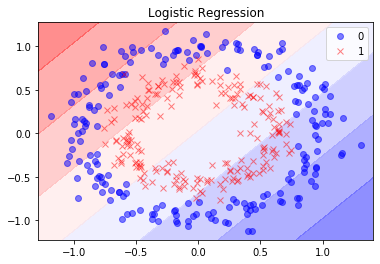

In [21]:
# 만든 모델과 X, y를 던져보기!
plot_decision_bound(model, X, y)
plt.title("Logistic Regression")

# 과소적합의 대표적인 예
# 놓치는 부분도 있고~

In [16]:
# p.134 ~ 135
# 모델 개선하기
# 다시 보기~!

from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)
model = Sequential()

# relu : 음수는 취급 x, 특정 임계값 넘어가면 특정 ~~
model.add(Dense(3, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy')
model.fit(X, y, batch_size = 5, epochs = 200, verbose = 1)
# 75%까지 확률을 높였음!
# 초기 확률은 30%
# 굉장한 성능 발전을 했음.

# 하지만, 여전히 아쉬운 것은 
# 확률이 아직 75%밖에 안 되는 것!

Epoch 1/200
80/80 [==============================] - 0s 480us/step - loss: 0.6680
Epoch 2/200
80/80 [==============================] - 0s 484us/step - loss: 0.6611
Epoch 3/200
80/80 [==============================] - 0s 531us/step - loss: 0.6566
Epoch 4/200
80/80 [==============================] - 0s 611us/step - loss: 0.6534
Epoch 5/200
80/80 [==============================] - 0s 825us/step - loss: 0.6510
Epoch 6/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6490
Epoch 7/200
80/80 [==============================] - 0s 815us/step - loss: 0.6472
Epoch 8/200
80/80 [==============================] - 0s 485us/step - loss: 0.6455
Epoch 9/200
80/80 [==============================] - 0s 576us/step - loss: 0.6440
Epoch 10/200
80/80 [==============================] - 0s 982us/step - loss: 0.6425
Epoch 11/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6412
Epoch 12/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6395
Epoch 13/200
80/80 

80/80 [==============================] - 0s 605us/step - loss: 0.5216
Epoch 101/200
80/80 [==============================] - 0s 621us/step - loss: 0.5198
Epoch 102/200
80/80 [==============================] - 0s 840us/step - loss: 0.5180
Epoch 103/200
80/80 [==============================] - 0s 640us/step - loss: 0.5163
Epoch 104/200
80/80 [==============================] - 0s 522us/step - loss: 0.5143
Epoch 105/200
80/80 [==============================] - 0s 500us/step - loss: 0.5126
Epoch 106/200
80/80 [==============================] - 0s 489us/step - loss: 0.5107
Epoch 107/200
80/80 [==============================] - 0s 797us/step - loss: 0.5086
Epoch 108/200
80/80 [==============================] - 0s 918us/step - loss: 0.5068
Epoch 109/200
80/80 [==============================] - 0s 615us/step - loss: 0.5049
Epoch 110/200
80/80 [==============================] - 0s 595us/step - loss: 0.5029
Epoch 111/200
80/80 [==============================] - 0s 588us/step - loss: 0.5013
Epoch 

80/80 [==============================] - 0s 693us/step - loss: 0.3169
Epoch 199/200
80/80 [==============================] - 0s 682us/step - loss: 0.3158
Epoch 200/200
80/80 [==============================] - 0s 771us/step - loss: 0.3146


amin =  -1.2816529526885447
bmin =  -1.222835878671317
amax =  1.405132554307814
bmax =  1.2746496919432166


Text(0.5, 1.0, 'Hidden Layer 3(tanh)')

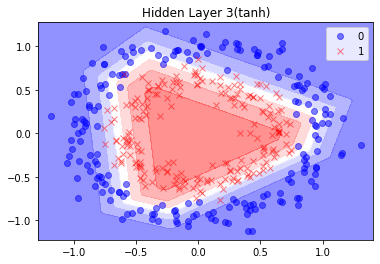

In [17]:
plot_decision_bound(model, X, y)
plt.title("Hidden Layer 3(tanh)")

# 등고선을 기준으로 했을 때 흰색과 파란색에 들어가 있는 x가 월등히 적어진 것을 알 수 있음.

In [18]:
# 다시

from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)
model = Sequential()

# relu : 음수는 취급 x, 특정 임계값 넘어가면 특정 ~~
model.add(Dense(6, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy')
model.fit(X, y, batch_size = 5, epochs = 200, verbose = 1)
# 히든 레이어를 6으로 올리니까
# 확률이 0.9%정도로 성능 향상 됨!

Epoch 1/200
80/80 [==============================] - 0s 597us/step - loss: 0.6968
Epoch 2/200
80/80 [==============================] - 0s 544us/step - loss: 0.6818
Epoch 3/200
80/80 [==============================] - 0s 772us/step - loss: 0.6704
Epoch 4/200
80/80 [==============================] - 0s 973us/step - loss: 0.6621
Epoch 5/200
80/80 [==============================] - 0s 931us/step - loss: 0.6552
Epoch 6/200
80/80 [==============================] - 0s 894us/step - loss: 0.6494
Epoch 7/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6443
Epoch 8/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6398
Epoch 9/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6356
Epoch 10/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6316
Epoch 11/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6278
Epoch 12/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6242
Epoch 13/200
80/80 [=====

80/80 [==============================] - 0s 970us/step - loss: 0.2966
Epoch 101/200
80/80 [==============================] - 0s 952us/step - loss: 0.2938
Epoch 102/200
80/80 [==============================] - 0s 1ms/step - loss: 0.2906
Epoch 103/200
80/80 [==============================] - 0s 2ms/step - loss: 0.2874
Epoch 104/200
80/80 [==============================] - 0s 2ms/step - loss: 0.2844
Epoch 105/200
80/80 [==============================] - 0s 2ms/step - loss: 0.2815
Epoch 106/200
80/80 [==============================] - 0s 1ms/step - loss: 0.2788
Epoch 107/200
80/80 [==============================] - 0s 1ms/step - loss: 0.2761
Epoch 108/200
80/80 [==============================] - 0s 1ms/step - loss: 0.2729
Epoch 109/200
80/80 [==============================] - 0s 1ms/step - loss: 0.2703
Epoch 110/200
80/80 [==============================] - 0s 1ms/step - loss: 0.2675
Epoch 111/200
80/80 [==============================] - 0s 1ms/step - loss: 0.2646
Epoch 112/200
80/80 [=====

80/80 [==============================] - 0s 1ms/step - loss: 0.1303
Epoch 200/200
80/80 [==============================] - 0s 1ms/step - loss: 0.1297


amin =  -1.2816529526885447
bmin =  -1.222835878671317
amax =  1.405132554307814
bmax =  1.2746496919432166


Text(0.5, 1.0, 'Hidden Layer 3(tanh)')

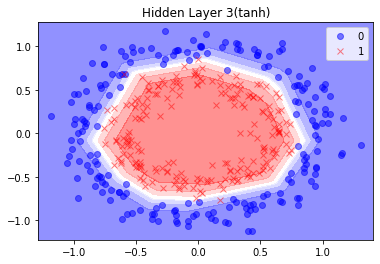

In [19]:
plot_decision_bound(model, X, y)
plt.title("Hidden Layer 3(tanh)")

#나름 분류 잘 하고 있음!

In [20]:
# 다시~
# 성능 향상을 위해 무엇을 하면 좋을까?
# 샘플 개수가 적더라도 정확한 데이터를 수집하는게 중요하다.
# 잘못된 정보를 수집하면 제대로된 A.I가 될 수 없다.

# 샘플의 개수가 적으니 인공 신경망의 특성상
# 성능의 저하가 발생한 것을 확인할 수 있었다.

# 데이터가 많아지면 많아질 수록 반응 속도가 점점 떨어짐
# 데이터가 많아져도 93%정도로 귀결 됨.
# 이 데이터는 93%로 수렴하는 것 (일정 구간 이후로는 향상되지 않음)

In [21]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)
model = Sequential()


model.add(Dense(12, activation = 'relu', input_dim = 2))
model.add(Dense(6, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy')
model.fit(X, y, batch_size = 5, epochs = 500, verbose = 1)


Epoch 1/500
80/80 [==============================] - 0s 489us/step - loss: 0.6719
Epoch 2/500
80/80 [==============================] - 0s 492us/step - loss: 0.6630
Epoch 3/500
80/80 [==============================] - 0s 486us/step - loss: 0.6554
Epoch 4/500
80/80 [==============================] - 0s 596us/step - loss: 0.6475
Epoch 5/500
80/80 [==============================] - 0s 648us/step - loss: 0.6398
Epoch 6/500
80/80 [==============================] - 0s 928us/step - loss: 0.6317
Epoch 7/500
80/80 [==============================] - 0s 972us/step - loss: 0.6234
Epoch 8/500
80/80 [==============================] - 0s 991us/step - loss: 0.6150
Epoch 9/500
80/80 [==============================] - 0s 984us/step - loss: 0.6057
Epoch 10/500
80/80 [==============================] - 0s 980us/step - loss: 0.5965
Epoch 11/500
80/80 [==============================] - 0s 986us/step - loss: 0.5860
Epoch 12/500
80/80 [==============================] - 0s 999us/step - loss: 0.5753
Epoch 13/500


80/80 [==============================] - 0s 806us/step - loss: 0.0664
Epoch 102/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0669
Epoch 103/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0658
Epoch 104/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0655
Epoch 105/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0641
Epoch 106/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0638
Epoch 107/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0640
Epoch 108/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0640
Epoch 109/500
80/80 [==============================] - 0s 981us/step - loss: 0.0637
Epoch 110/500
80/80 [==============================] - 0s 814us/step - loss: 0.0629
Epoch 111/500
80/80 [==============================] - 0s 802us/step - loss: 0.0628
Epoch 112/500
80/80 [==============================] - 0s 887us/step - loss: 0.0617
Epoch 113/500
80/80 

80/80 [==============================] - 0s 1ms/step - loss: 0.0485
Epoch 201/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0481
Epoch 202/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0479
Epoch 203/500
80/80 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 204/500
80/80 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 205/500
80/80 [==============================] - 0s 758us/step - loss: 0.0477
Epoch 206/500
80/80 [==============================] - 0s 617us/step - loss: 0.0469
Epoch 207/500
80/80 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 208/500
80/80 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 209/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0479
Epoch 210/500
80/80 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 211/500
80/80 [==============================] - 0s 2ms/step - loss: 0.0470
Epoch 212/500
80/80 [=====

80/80 [==============================] - 0s 972us/step - loss: 0.0463
Epoch 300/500
80/80 [==============================] - 0s 813us/step - loss: 0.0434
Epoch 301/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0411
Epoch 302/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0425
Epoch 303/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0444
Epoch 304/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0443
Epoch 305/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0425
Epoch 306/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0419
Epoch 307/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0407
Epoch 308/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0417
Epoch 309/500
80/80 [==============================] - 0s 2ms/step - loss: 0.0433
Epoch 310/500
80/80 [==============================] - 0s 2ms/step - loss: 0.0422
Epoch 311/500
80/80 [=====

80/80 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 399/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0429
Epoch 400/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0385
Epoch 401/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0419
Epoch 402/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0372
Epoch 403/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0414
Epoch 404/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0401
Epoch 405/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0388
Epoch 406/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0398
Epoch 407/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0421
Epoch 408/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0373
Epoch 409/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 410/500
80/80 [=========

80/80 [==============================] - 0s 496us/step - loss: 0.0381
Epoch 497/500
80/80 [==============================] - 0s 475us/step - loss: 0.0387
Epoch 498/500
80/80 [==============================] - 0s 487us/step - loss: 0.0374
Epoch 499/500
80/80 [==============================] - 0s 538us/step - loss: 0.0386
Epoch 500/500
80/80 [==============================] - 0s 834us/step - loss: 0.0375


amin =  -1.2816529526885447
bmin =  -1.222835878671317
amax =  1.405132554307814
bmax =  1.2746496919432166


Text(0.5, 1.0, 'Hidden Layer 6(tanh)')

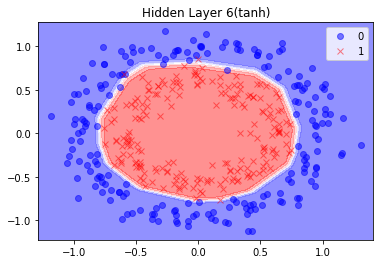

In [22]:
plot_decision_bound(model, X, y)
plt.title("Hidden Layer 6(tanh)")

# 빨간색, 파란색 구분이 잘 되어 있음
# 애매한 흰부분이 있지만 아주 작은 부분이니까 괜찮음!

In [23]:
# 더 향상시켜보자!
# 레이어를 더 복잡하게 구성해보자!

from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)
model = Sequential()


model.add(Dense(256, activation = 'relu', input_dim = 2))
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(96, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(16, activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy')
model.fit(X, y, batch_size = 5, epochs = 500, verbose = 1)


Epoch 1/500
80/80 [==============================] - 0s 800us/step - loss: 0.6784
Epoch 2/500
80/80 [==============================] - 0s 752us/step - loss: 0.6518
Epoch 3/500
80/80 [==============================] - 0s 626us/step - loss: 0.6119
Epoch 4/500
80/80 [==============================] - 0s 671us/step - loss: 0.5289
Epoch 5/500
80/80 [==============================] - 0s 705us/step - loss: 0.3891
Epoch 6/500
80/80 [==============================] - 0s 634us/step - loss: 0.2576
Epoch 7/500
80/80 [==============================] - 0s 607us/step - loss: 0.1893
Epoch 8/500
80/80 [==============================] - 0s 621us/step - loss: 0.1431
Epoch 9/500
80/80 [==============================] - 0s 620us/step - loss: 0.1536
Epoch 10/500
80/80 [==============================] - 0s 766us/step - loss: 0.1513
Epoch 11/500
80/80 [==============================] - 0s 682us/step - loss: 0.1200
Epoch 12/500
80/80 [==============================] - 0s 671us/step - loss: 0.0996
Epoch 13/500


Epoch 100/500
80/80 [==============================] - 0s 812us/step - loss: 0.0589
Epoch 101/500
80/80 [==============================] - 0s 721us/step - loss: 0.0405
Epoch 102/500
80/80 [==============================] - 0s 850us/step - loss: 0.0374
Epoch 103/500
80/80 [==============================] - 0s 914us/step - loss: 0.0525
Epoch 104/500
80/80 [==============================] - 0s 812us/step - loss: 0.0384
Epoch 105/500
80/80 [==============================] - 0s 787us/step - loss: 0.0321
Epoch 106/500
80/80 [==============================] - 0s 777us/step - loss: 0.0448
Epoch 107/500
80/80 [==============================] - 0s 672us/step - loss: 0.0481
Epoch 108/500
80/80 [==============================] - 0s 661us/step - loss: 0.0684
Epoch 109/500
80/80 [==============================] - 0s 657us/step - loss: 0.0593
Epoch 110/500
80/80 [==============================] - 0s 651us/step - loss: 0.0502
Epoch 111/500
80/80 [==============================] - 0s 642us/step - loss:

80/80 [==============================] - 0s 649us/step - loss: 0.0389
Epoch 198/500
80/80 [==============================] - 0s 740us/step - loss: 0.0479
Epoch 199/500
80/80 [==============================] - 0s 639us/step - loss: 0.0642
Epoch 200/500
80/80 [==============================] - 0s 684us/step - loss: 0.0359
Epoch 201/500
80/80 [==============================] - 0s 690us/step - loss: 0.0363
Epoch 202/500
80/80 [==============================] - 0s 687us/step - loss: 0.0378
Epoch 203/500
80/80 [==============================] - 0s 711us/step - loss: 0.0328
Epoch 204/500
80/80 [==============================] - 0s 624us/step - loss: 0.0271
Epoch 205/500
80/80 [==============================] - 0s 700us/step - loss: 0.0247
Epoch 206/500
80/80 [==============================] - 0s 669us/step - loss: 0.0484
Epoch 207/500
80/80 [==============================] - 0s 707us/step - loss: 0.0589
Epoch 208/500
80/80 [==============================] - 0s 669us/step - loss: 0.0286
Epoch 

80/80 [==============================] - 0s 849us/step - loss: 0.1086
Epoch 295/500
80/80 [==============================] - 0s 768us/step - loss: 0.0232
Epoch 296/500
80/80 [==============================] - 0s 788us/step - loss: 0.0240
Epoch 297/500
80/80 [==============================] - 0s 763us/step - loss: 0.0213
Epoch 298/500
80/80 [==============================] - 0s 794us/step - loss: 0.0492
Epoch 299/500
80/80 [==============================] - 0s 740us/step - loss: 0.0680
Epoch 300/500
80/80 [==============================] - 0s 780us/step - loss: 0.0253
Epoch 301/500
80/80 [==============================] - 0s 783us/step - loss: 0.0244
Epoch 302/500
80/80 [==============================] - 0s 845us/step - loss: 0.0215
Epoch 303/500
80/80 [==============================] - 0s 659us/step - loss: 0.0318
Epoch 304/500
80/80 [==============================] - 0s 626us/step - loss: 0.0227
Epoch 305/500
80/80 [==============================] - 0s 626us/step - loss: 0.0512
Epoch 

80/80 [==============================] - 0s 657us/step - loss: 0.0207
Epoch 392/500
80/80 [==============================] - 0s 653us/step - loss: 0.0235
Epoch 393/500
80/80 [==============================] - 0s 692us/step - loss: 0.0201
Epoch 394/500
80/80 [==============================] - 0s 721us/step - loss: 0.0188
Epoch 395/500
80/80 [==============================] - 0s 693us/step - loss: 0.0193
Epoch 396/500
80/80 [==============================] - 0s 654us/step - loss: 0.0197
Epoch 397/500
80/80 [==============================] - 0s 636us/step - loss: 0.0285
Epoch 398/500
80/80 [==============================] - 0s 658us/step - loss: 0.1069
Epoch 399/500
80/80 [==============================] - 0s 690us/step - loss: 0.0965
Epoch 400/500
80/80 [==============================] - 0s 645us/step - loss: 0.0221
Epoch 401/500
80/80 [==============================] - 0s 659us/step - loss: 0.0556
Epoch 402/500
80/80 [==============================] - 0s 735us/step - loss: 0.0230
Epoch 

80/80 [==============================] - 0s 787us/step - loss: 0.0840
Epoch 489/500
80/80 [==============================] - 0s 826us/step - loss: 0.0318
Epoch 490/500
80/80 [==============================] - 0s 786us/step - loss: 0.0209
Epoch 491/500
80/80 [==============================] - 0s 844us/step - loss: 0.0241
Epoch 492/500
80/80 [==============================] - 0s 788us/step - loss: 0.0205
Epoch 493/500
80/80 [==============================] - 0s 765us/step - loss: 0.0181
Epoch 494/500
80/80 [==============================] - 0s 798us/step - loss: 0.0183
Epoch 495/500
80/80 [==============================] - 0s 787us/step - loss: 0.0180
Epoch 496/500
80/80 [==============================] - 0s 809us/step - loss: 0.0182
Epoch 497/500
80/80 [==============================] - 0s 790us/step - loss: 0.0418
Epoch 498/500
80/80 [==============================] - 0s 763us/step - loss: 0.0603
Epoch 499/500
80/80 [==============================] - 0s 779us/step - loss: 0.0242
Epoch 

amin =  -1.2816529526885447
bmin =  -1.222835878671317
amax =  1.405132554307814
bmax =  1.2746496919432166


Text(0.5, 1.0, 'Hidden Layer 6(tanh)')

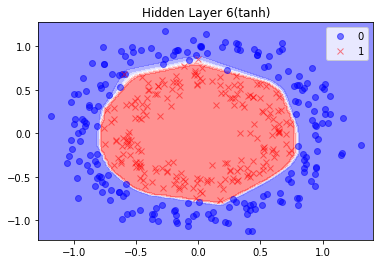

In [24]:
plot_decision_bound(model, X, y)
plt.title("Hidden Layer 6(tanh)")

In [25]:
# 더 향상시켜보자!
# 레이어를 더 복잡하게 구성해보자!

from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)
model = Sequential()


model.add(Dense(256, activation = 'relu', input_dim = 2))
model.add(Dense(192, activation = 'relu'))
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(96, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(16, activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy')
model.fit(X, y, batch_size = 5, epochs = 500, verbose = 1)

# 진동을 잡을 수 있을지가 관건! >>?
# 진동을 무엇으로 잡을지를 고민해 봐야 함.
# 진동 : loss 값이 떨어졌다 올랐다 하는 부분!!

Epoch 1/500
80/80 [==============================] - 0s 822us/step - loss: 0.6815
Epoch 2/500
80/80 [==============================] - 0s 767us/step - loss: 0.6514
Epoch 3/500
80/80 [==============================] - 0s 709us/step - loss: 0.6044
Epoch 4/500
80/80 [==============================] - 0s 699us/step - loss: 0.5087
Epoch 5/500
80/80 [==============================] - 0s 720us/step - loss: 0.3574
Epoch 6/500
80/80 [==============================] - 0s 765us/step - loss: 0.2370
Epoch 7/500
80/80 [==============================] - 0s 746us/step - loss: 0.1789
Epoch 8/500
80/80 [==============================] - 0s 727us/step - loss: 0.1647
Epoch 9/500
80/80 [==============================] - 0s 725us/step - loss: 0.1636
Epoch 10/500
80/80 [==============================] - 0s 831us/step - loss: 0.1606
Epoch 11/500
80/80 [==============================] - 0s 732us/step - loss: 0.1385
Epoch 12/500
80/80 [==============================] - 0s 736us/step - loss: 0.1206
Epoch 13/500


80/80 [==============================] - 0s 833us/step - loss: 0.0487
Epoch 100/500
80/80 [==============================] - 0s 857us/step - loss: 0.0525
Epoch 101/500
80/80 [==============================] - 0s 804us/step - loss: 0.0398
Epoch 102/500
80/80 [==============================] - 0s 831us/step - loss: 0.0428
Epoch 103/500
80/80 [==============================] - 0s 840us/step - loss: 0.0611
Epoch 104/500
80/80 [==============================] - 0s 830us/step - loss: 0.0460
Epoch 105/500
80/80 [==============================] - 0s 794us/step - loss: 0.0593
Epoch 106/500
80/80 [==============================] - 0s 798us/step - loss: 0.0501
Epoch 107/500
80/80 [==============================] - 0s 842us/step - loss: 0.0403
Epoch 108/500
80/80 [==============================] - 0s 802us/step - loss: 0.0814
Epoch 109/500
80/80 [==============================] - 0s 806us/step - loss: 0.0440
Epoch 110/500
80/80 [==============================] - 0s 817us/step - loss: 0.0413
Epoch 

80/80 [==============================] - 0s 727us/step - loss: 0.0354
Epoch 197/500
80/80 [==============================] - 0s 721us/step - loss: 0.0454
Epoch 198/500
80/80 [==============================] - 0s 796us/step - loss: 0.0434
Epoch 199/500
80/80 [==============================] - 0s 739us/step - loss: 0.0268
Epoch 200/500
80/80 [==============================] - 0s 736us/step - loss: 0.0321
Epoch 201/500
80/80 [==============================] - 0s 712us/step - loss: 0.0280
Epoch 202/500
80/80 [==============================] - 0s 818us/step - loss: 0.0441
Epoch 203/500
80/80 [==============================] - 0s 762us/step - loss: 0.0376
Epoch 204/500
80/80 [==============================] - 0s 708us/step - loss: 0.0470
Epoch 205/500
80/80 [==============================] - 0s 771us/step - loss: 0.0370
Epoch 206/500
80/80 [==============================] - 0s 782us/step - loss: 0.0467
Epoch 207/500
80/80 [==============================] - 0s 735us/step - loss: 0.0431
Epoch 

80/80 [==============================] - 0s 879us/step - loss: 0.0454
Epoch 294/500
80/80 [==============================] - 0s 943us/step - loss: 0.0497
Epoch 295/500
80/80 [==============================] - 0s 894us/step - loss: 0.0291
Epoch 296/500
80/80 [==============================] - 0s 889us/step - loss: 0.0331
Epoch 297/500
80/80 [==============================] - 0s 989us/step - loss: 0.0243
Epoch 298/500
80/80 [==============================] - 0s 869us/step - loss: 0.0250
Epoch 299/500
80/80 [==============================] - 0s 876us/step - loss: 0.0216
Epoch 300/500
80/80 [==============================] - 0s 984us/step - loss: 0.0241
Epoch 301/500
80/80 [==============================] - 0s 873us/step - loss: 0.0226
Epoch 302/500
80/80 [==============================] - 0s 911us/step - loss: 0.0222
Epoch 303/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0545
Epoch 304/500
80/80 [==============================] - 0s 804us/step - loss: 0.0525
Epoch 30

80/80 [==============================] - 0s 882us/step - loss: 0.0250
Epoch 391/500
80/80 [==============================] - 0s 870us/step - loss: 0.0174
Epoch 392/500
80/80 [==============================] - 0s 845us/step - loss: 0.0173
Epoch 393/500
80/80 [==============================] - 0s 868us/step - loss: 0.0187
Epoch 394/500
80/80 [==============================] - 0s 894us/step - loss: 0.0178
Epoch 395/500
80/80 [==============================] - 0s 877us/step - loss: 0.0616
Epoch 396/500
80/80 [==============================] - 0s 879us/step - loss: 0.0479
Epoch 397/500
80/80 [==============================] - 0s 882us/step - loss: 0.0262
Epoch 398/500
80/80 [==============================] - 0s 935us/step - loss: 0.0218
Epoch 399/500
80/80 [==============================] - 0s 882us/step - loss: 0.0215
Epoch 400/500
80/80 [==============================] - 0s 960us/step - loss: 0.0200
Epoch 401/500
80/80 [==============================] - 0s 938us/step - loss: 0.0218
Epoch 

80/80 [==============================] - 0s 758us/step - loss: 0.0969
Epoch 488/500
80/80 [==============================] - 0s 727us/step - loss: 0.0191
Epoch 489/500
80/80 [==============================] - 0s 778us/step - loss: 0.0199
Epoch 490/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0196
Epoch 491/500
80/80 [==============================] - 0s 990us/step - loss: 0.0251
Epoch 492/500
80/80 [==============================] - 0s 975us/step - loss: 0.0322
Epoch 493/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0187
Epoch 494/500
80/80 [==============================] - 0s 974us/step - loss: 0.0171
Epoch 495/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 496/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 497/500
80/80 [==============================] - 0s 984us/step - loss: 0.0175
Epoch 498/500
80/80 [==============================] - 0s 964us/step - loss: 0.0156
Epoch 499/500


amin =  -1.2816529526885447
bmin =  -1.222835878671317
amax =  1.405132554307814
bmax =  1.2746496919432166


Text(0.5, 1.0, 'Hidden Layer 6(tanh)')

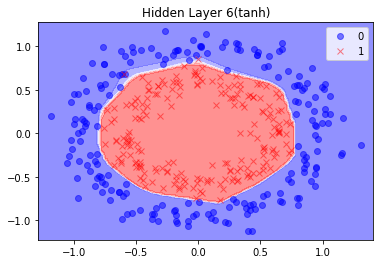

In [26]:
plot_decision_bound(model, X, y)
plt.title("Hidden Layer 6(tanh)")

In [27]:
# 다시
# 더 향상시켜보자!
# 레이어를 더 복잡하게 구성해보자!

from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)
model = Sequential()

# 네트워크 엄청 복잡하게 해서 향상되는지 확인
# 하지만 성능 향상은 2%밖에 안됐음.
# 하지만 나중에 이걸로 돈을 버냐안버냐의 차이는 이 1%로 갈림!

# 네트워크 구성할 때 정확도도 중요한데 빨라야하는 것도 고려해야 함!
model.add(Dense(500, activation = 'relu', input_dim = 2))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(192, activation = 'relu'))
model.add(Dense(256, activation = 'tanh', input_dim = 2))
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(96, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(16, activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy')
model.fit(X, y, batch_size = 5, epochs = 600, verbose = 1)

# 진동을 잡을 수 있을지가 관건! >>?
# 진동을 무엇으로 잡을지를 고민해 봐야 함.
# 진동 : loss 값이 떨어졌다 올랐다 하는 부분!!




Epoch 1/600
80/80 [==============================] - 0s 1ms/step - loss: 0.6922
Epoch 2/600
80/80 [==============================] - 0s 1ms/step - loss: 0.6870
Epoch 3/600
80/80 [==============================] - 0s 1ms/step - loss: 0.6776
Epoch 4/600
80/80 [==============================] - 0s 1ms/step - loss: 0.6657
Epoch 5/600
80/80 [==============================] - 0s 1ms/step - loss: 0.6380
Epoch 6/600
80/80 [==============================] - 0s 1ms/step - loss: 0.5780
Epoch 7/600
80/80 [==============================] - 0s 1ms/step - loss: 0.4472
Epoch 8/600
80/80 [==============================] - 0s 1ms/step - loss: 0.3164
Epoch 9/600
80/80 [==============================] - 0s 1ms/step - loss: 0.2622
Epoch 10/600
80/80 [==============================] - 0s 1ms/step - loss: 0.2156
Epoch 11/600
80/80 [==============================] - 0s 1ms/step - loss: 0.2097
Epoch 12/600
80/80 [==============================] - 0s 1ms/step - loss: 0.1862
Epoch 13/600
80/80 [=================

80/80 [==============================] - 0s 1ms/step - loss: 0.0610
Epoch 103/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0537
Epoch 104/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0366
Epoch 105/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 106/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 107/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0536
Epoch 108/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0679
Epoch 109/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0411
Epoch 110/600
80/80 [==============================] - 0s 992us/step - loss: 0.0602
Epoch 111/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0410
Epoch 112/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0446
Epoch 113/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0419
Epoch 114/600
80/80 [=======

80/80 [==============================] - 0s 1ms/step - loss: 0.0431
Epoch 203/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0451
Epoch 204/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0433
Epoch 205/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0287
Epoch 206/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0506
Epoch 207/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 208/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 209/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0379
Epoch 210/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0613
Epoch 211/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0429
Epoch 212/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0442
Epoch 213/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0265
Epoch 214/600
80/80 [=========

80/80 [==============================] - 0s 1ms/step - loss: 0.0273
Epoch 303/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 304/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0258
Epoch 305/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch 306/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0213
Epoch 307/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0192
Epoch 308/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0382
Epoch 309/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0357
Epoch 310/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 311/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0185
Epoch 312/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0185
Epoch 313/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 314/600
80/80 [=========

80/80 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 403/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0187
Epoch 404/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0892
Epoch 405/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0370
Epoch 406/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 407/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 408/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0356
Epoch 409/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 410/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 411/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0175
Epoch 412/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0373
Epoch 413/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 414/600
80/80 [=========

80/80 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 503/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 504/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 505/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0811
Epoch 506/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0559
Epoch 507/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0279
Epoch 508/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 509/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 510/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0143
Epoch 511/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 512/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 513/600
80/80 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 514/600
80/80 [=========

amin =  -1.2816529526885447
bmin =  -1.222835878671317
amax =  1.405132554307814
bmax =  1.2746496919432166


Text(0.5, 1.0, 'Hidden Layer 6(tanh)')

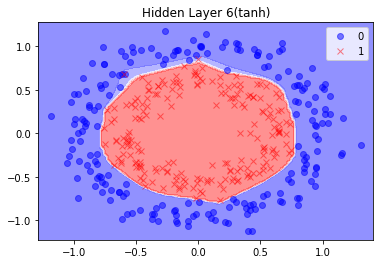

In [28]:
plot_decision_bound(model, X, y)
plt.title("Hidden Layer 6(tanh)")

# 그래도 성능 많이 향상
# 빨간 x표시가 나온게 ~~~

In [29]:
# 4장
# 교차 검증

!ls

Applied-Deep-Learning-with-Keras  LICENSE		 seventh.ipynb
data				  nineth.ipynb		 tenth.ipynb
eighth.ipynb			  nineth_practice.ipynb  Untitled.ipynb
eleventh.ipynb			  README.md


In [30]:
!ls Applied-Deep-Learning-with-Keras/Lesson02

Activity02.ipynb     bank_data_target.csv  Exercise07.ipynb  Exercise09.ipynb
bank_data_feats.csv  Exercise06.ipynb	   Exercise08.ipynb


In [47]:
import pandas as pd

data = pd.read_csv(
    "Applied-Deep-Learning-with-Keras/Lesson02/bank_data_feats.csv", index_col = 0
)
y = pd.read_csv(
    "Applied-Deep-Learning-with-Keras/Lesson02/bank_data_target.csv", index_col = 0
)

X = data

In [48]:
print("Num of Dataset =", data.shape[0])
print("Num of Features =", data.shape[1])
# 독립변수가 32개!
print(y.shape)

Num of Dataset = 4521
Num of Features = 32
(4521, 1)


In [49]:
# 모델 만들어서 교차검증
# 다시
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    # 전역변수 X에 shape을 가져오는 형식으로!
    model.add(Dense(16, input_dim = X.shape[1], activation = 'relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy']
    )
    return model

In [50]:
# 교차 검증 실행할 준비

import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [51]:
seed = 1

np.random.seed(seed)

In [52]:
# 교차 검증하는 횟수
n_folds = 5
epochs = 300
batch_size = 5

# 분류 작업을 할 때 사용하는 분류기 생성자
classifier = KerasClassifier(
    # 실질적으로 분류를 수행하는데 사용할 모델을 만드는 함수
    build_fn = build_model,
    # 몇 회 반복을 할 것인가
    epochs = epochs,
    # 너비, 높이, 배치 사이즈
    batch_size = batch_size,
    verbose = 1
)

In [55]:
help(StratifiedKFold)

Help on class StratifiedKFold in module sklearn.model_selection._split:

class StratifiedKFold(_BaseKFold)
 |  StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
 |  
 |  Stratified K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets.
 |  
 |  This cross-validation object is a variation of KFold that returns
 |  stratified folds. The folds are made by preserving the percentage of
 |  samples for each class.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=5
 |      Number of folds. Must be at least 2.
 |  
 |      .. versionchanged:: 0.22
 |          ``n_splits`` default value changed from 3 to 5.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle each class's samples before splitting into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number

In [53]:
# StratifiedKFold는 우리가 가지고 있는 Train, Test 데이터에 대한 검증 생성자
# Train, Test 데이터가 총합 1000개 있다고 가정하면
# 1. Train 0 ~ 799, Test 800 ~ 999
# 2. Train 200 ~ 999, Test 0 ~ 1999
# 3. Train 0 ~ 199, 400 ~ 999, Test 200 ~ 399
#  다시
# index는 배열 >> indices는 index의 복수 
kfold = StratifiedKFold(
    # 전체 구간을 5번으로 분항해서 검증하도록 만든다.
    n_splits = n_folds,
    shuffle = True,
    random_state = seed   # 설명 다시 듣기
    # seed가 1이니까 100%인데 ~~
    # ~~
    # 이 데이터가 유지되는 한, loss 없이 ~

)

# 시간 엄청 오래 걸림!
# 교차 검증한다는 것이 작업이 많이 때문에!

# 400 다 돌면
# 다시 1로 또 돌고 있음!
# >>> 위치 바꿔서 검증하고 있기 때문에!!


# (결과)
# 최종적으로 정확도는 89%! (10개 중 9개는 맞춘다!)
# ~~ 평균

In [54]:
# 다시
# 위에서 만든 분류기와 검증기를 전달해서 X, y값에 대한 교차 검증을 수행한다.
results = cross_val_score(classifier, X, y, cv = kfold)

Epoch 1/300
724/724 [==============================] - 1s 976us/step - loss: 0.9896 - accuracy: 0.8548
Epoch 2/300
724/724 [==============================] - 1s 980us/step - loss: 0.8837 - accuracy: 0.8504
Epoch 3/300
724/724 [==============================] - 0s 665us/step - loss: 0.7056 - accuracy: 0.8565
Epoch 4/300
724/724 [==============================] - 1s 793us/step - loss: 0.6912 - accuracy: 0.8565
Epoch 5/300
724/724 [==============================] - 1s 803us/step - loss: 0.6682 - accuracy: 0.8639
Epoch 6/300
724/724 [==============================] - 1s 805us/step - loss: 0.6006 - accuracy: 0.8595
Epoch 7/300
724/724 [==============================] - 1s 803us/step - loss: 0.5243 - accuracy: 0.8659
Epoch 8/300
724/724 [==============================] - 1s 791us/step - loss: 0.4910 - accuracy: 0.8686
Epoch 9/300
724/724 [==============================] - 0s 617us/step - loss: 0.5809 - accuracy: 0.8650
Epoch 10/300
724/724 [==============================] - 0s 638us/step - l

724/724 [==============================] - 1s 829us/step - loss: 0.2671 - accuracy: 0.8877
Epoch 80/300
724/724 [==============================] - 1s 845us/step - loss: 0.2622 - accuracy: 0.8880
Epoch 81/300
724/724 [==============================] - 1s 852us/step - loss: 0.2751 - accuracy: 0.8833
Epoch 82/300
724/724 [==============================] - 1s 850us/step - loss: 0.2680 - accuracy: 0.8855
Epoch 83/300
724/724 [==============================] - 1s 846us/step - loss: 0.2569 - accuracy: 0.8899
Epoch 84/300
724/724 [==============================] - 1s 838us/step - loss: 0.2640 - accuracy: 0.8861
Epoch 85/300
724/724 [==============================] - 1s 875us/step - loss: 0.2629 - accuracy: 0.8850
Epoch 86/300
724/724 [==============================] - 1s 897us/step - loss: 0.2633 - accuracy: 0.8852
Epoch 87/300
724/724 [==============================] - 1s 966us/step - loss: 0.2708 - accuracy: 0.8874
Epoch 88/300
724/724 [==============================] - 1s 981us/step - loss:

724/724 [==============================] - 1s 968us/step - loss: 0.2504 - accuracy: 0.8910
Epoch 158/300
724/724 [==============================] - 1s 764us/step - loss: 0.2565 - accuracy: 0.8872
Epoch 159/300
724/724 [==============================] - 1s 750us/step - loss: 0.2554 - accuracy: 0.8930
Epoch 160/300
724/724 [==============================] - 1s 821us/step - loss: 0.2542 - accuracy: 0.8894
Epoch 161/300
724/724 [==============================] - 1s 835us/step - loss: 0.2462 - accuracy: 0.8905
Epoch 162/300
724/724 [==============================] - 1s 838us/step - loss: 0.2498 - accuracy: 0.8894
Epoch 163/300
724/724 [==============================] - 1s 842us/step - loss: 0.2525 - accuracy: 0.8874
Epoch 164/300
724/724 [==============================] - 1s 844us/step - loss: 0.2478 - accuracy: 0.8910
Epoch 165/300
724/724 [==============================] - 1s 846us/step - loss: 0.2533 - accuracy: 0.8891
Epoch 166/300
724/724 [==============================] - 1s 803us/ste

724/724 [==============================] - 1s 829us/step - loss: 0.2406 - accuracy: 0.8941
Epoch 236/300
724/724 [==============================] - 1s 888us/step - loss: 0.2420 - accuracy: 0.8910
Epoch 237/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2462 - accuracy: 0.8910
Epoch 238/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2452 - accuracy: 0.8897
Epoch 239/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2443 - accuracy: 0.8935
Epoch 240/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2414 - accuracy: 0.8935
Epoch 241/300
724/724 [==============================] - 1s 913us/step - loss: 0.2419 - accuracy: 0.8933
Epoch 242/300
724/724 [==============================] - 1s 786us/step - loss: 0.2455 - accuracy: 0.8924
Epoch 243/300
724/724 [==============================] - 1s 806us/step - loss: 0.2447 - accuracy: 0.8908
Epoch 244/300
724/724 [==============================] - 0s 570us/step - loss

724/724 [==============================] - 1s 771us/step - loss: 0.7225 - accuracy: 0.8609
Epoch 13/300
724/724 [==============================] - 1s 788us/step - loss: 0.5852 - accuracy: 0.8712
Epoch 14/300
724/724 [==============================] - 1s 784us/step - loss: 0.5858 - accuracy: 0.8654
Epoch 15/300
724/724 [==============================] - 1s 735us/step - loss: 0.5843 - accuracy: 0.8665
Epoch 16/300
724/724 [==============================] - 1s 966us/step - loss: 0.5187 - accuracy: 0.8761
Epoch 17/300
724/724 [==============================] - 1s 978us/step - loss: 0.5423 - accuracy: 0.8756
Epoch 18/300
724/724 [==============================] - 1s 959us/step - loss: 0.4283 - accuracy: 0.8753
Epoch 19/300
724/724 [==============================] - 1s 956us/step - loss: 0.3984 - accuracy: 0.8781
Epoch 20/300
724/724 [==============================] - 1s 782us/step - loss: 0.4578 - accuracy: 0.8778
Epoch 21/300
724/724 [==============================] - 1s 731us/step - loss:

724/724 [==============================] - 1s 1ms/step - loss: 0.2608 - accuracy: 0.8872
Epoch 92/300
724/724 [==============================] - 1s 719us/step - loss: 0.2562 - accuracy: 0.8936
Epoch 93/300
724/724 [==============================] - 1s 736us/step - loss: 0.2614 - accuracy: 0.8947
Epoch 94/300
724/724 [==============================] - 0s 686us/step - loss: 0.2595 - accuracy: 0.8911
Epoch 95/300
724/724 [==============================] - 1s 801us/step - loss: 0.2619 - accuracy: 0.8936
Epoch 96/300
724/724 [==============================] - 1s 805us/step - loss: 0.2567 - accuracy: 0.8925
Epoch 97/300
724/724 [==============================] - 1s 917us/step - loss: 0.2553 - accuracy: 0.8925
Epoch 98/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2518 - accuracy: 0.8972
Epoch 99/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2572 - accuracy: 0.8936
Epoch 100/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2545

724/724 [==============================] - 1s 733us/step - loss: 0.2439 - accuracy: 0.8983
Epoch 170/300
724/724 [==============================] - 1s 768us/step - loss: 0.2449 - accuracy: 0.8983
Epoch 171/300
724/724 [==============================] - 1s 760us/step - loss: 0.2429 - accuracy: 0.8977
Epoch 172/300
724/724 [==============================] - 1s 870us/step - loss: 0.2437 - accuracy: 0.8972
Epoch 173/300
724/724 [==============================] - 1s 934us/step - loss: 0.2471 - accuracy: 0.9013
Epoch 174/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2504 - accuracy: 0.8966
Epoch 175/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2415 - accuracy: 0.8996
Epoch 176/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2437 - accuracy: 0.8980
Epoch 177/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2413 - accuracy: 0.8991
Epoch 178/300
724/724 [==============================] - 1s 1ms/step - loss: 

724/724 [==============================] - 0s 663us/step - loss: 0.2406 - accuracy: 0.8980
Epoch 248/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2382 - accuracy: 0.8974
Epoch 249/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2362 - accuracy: 0.8983
Epoch 250/300
724/724 [==============================] - 1s 993us/step - loss: 0.2368 - accuracy: 0.9007
Epoch 251/300
724/724 [==============================] - 1s 740us/step - loss: 0.2360 - accuracy: 0.8988
Epoch 252/300
724/724 [==============================] - 1s 812us/step - loss: 0.2387 - accuracy: 0.8972
Epoch 253/300
724/724 [==============================] - 1s 852us/step - loss: 0.2398 - accuracy: 0.9002
Epoch 254/300
724/724 [==============================] - 1s 925us/step - loss: 0.2356 - accuracy: 0.9007
Epoch 255/300
724/724 [==============================] - 1s 940us/step - loss: 0.2348 - accuracy: 0.9032
Epoch 256/300
724/724 [==============================] - 1s 942us/step - 

724/724 [==============================] - 0s 617us/step - loss: 0.6608 - accuracy: 0.8731
Epoch 25/300
724/724 [==============================] - 1s 968us/step - loss: 0.6956 - accuracy: 0.8684
Epoch 26/300
724/724 [==============================] - 1s 1ms/step - loss: 0.9389 - accuracy: 0.8728
Epoch 27/300
724/724 [==============================] - 1s 1ms/step - loss: 0.5998 - accuracy: 0.8667
Epoch 28/300
724/724 [==============================] - 1s 2ms/step - loss: 0.6997 - accuracy: 0.8665
Epoch 29/300
724/724 [==============================] - 1s 1ms/step - loss: 0.5794 - accuracy: 0.8781
Epoch 30/300
724/724 [==============================] - 1s 1ms/step - loss: 0.5237 - accuracy: 0.8806
Epoch 31/300
724/724 [==============================] - 1s 1ms/step - loss: 0.4556 - accuracy: 0.8772
Epoch 32/300
724/724 [==============================] - 1s 2ms/step - loss: 0.7426 - accuracy: 0.8667
Epoch 33/300
724/724 [==============================] - 1s 2ms/step - loss: 0.5813 - accura

724/724 [==============================] - 1s 1ms/step - loss: 0.2610 - accuracy: 0.8947
Epoch 104/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2581 - accuracy: 0.8919
Epoch 105/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2639 - accuracy: 0.8944
Epoch 106/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2629 - accuracy: 0.8955
Epoch 107/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2549 - accuracy: 0.9002
Epoch 108/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2651 - accuracy: 0.8972
Epoch 109/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2539 - accuracy: 0.8972
Epoch 110/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2597 - accuracy: 0.8916
Epoch 111/300
724/724 [==============================] - 1s 826us/step - loss: 0.2657 - accuracy: 0.8919
Epoch 112/300
724/724 [==============================] - 0s 657us/step - loss: 0.2516

724/724 [==============================] - 1s 911us/step - loss: 0.2447 - accuracy: 0.9024
Epoch 182/300
724/724 [==============================] - 1s 899us/step - loss: 0.2417 - accuracy: 0.8996
Epoch 183/300
724/724 [==============================] - 1s 901us/step - loss: 0.2443 - accuracy: 0.8994
Epoch 184/300
724/724 [==============================] - 0s 685us/step - loss: 0.2440 - accuracy: 0.9030
Epoch 185/300
724/724 [==============================] - 0s 605us/step - loss: 0.2439 - accuracy: 0.9005
Epoch 186/300
724/724 [==============================] - 1s 852us/step - loss: 0.2432 - accuracy: 0.9013
Epoch 187/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2404 - accuracy: 0.9019
Epoch 188/300
724/724 [==============================] - 1s 991us/step - loss: 0.2497 - accuracy: 0.9002
Epoch 189/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2417 - accuracy: 0.8991
Epoch 190/300
724/724 [==============================] - 1s 1ms/step - lo

724/724 [==============================] - 1s 915us/step - loss: 0.2373 - accuracy: 0.8996
Epoch 260/300
724/724 [==============================] - 1s 923us/step - loss: 0.2376 - accuracy: 0.8994
Epoch 261/300
724/724 [==============================] - 1s 913us/step - loss: 0.2321 - accuracy: 0.9019
Epoch 262/300
724/724 [==============================] - 1s 903us/step - loss: 0.2357 - accuracy: 0.9024
Epoch 263/300
724/724 [==============================] - 1s 915us/step - loss: 0.2348 - accuracy: 0.9016
Epoch 264/300
724/724 [==============================] - 1s 951us/step - loss: 0.2355 - accuracy: 0.9013
Epoch 265/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2324 - accuracy: 0.9024
Epoch 266/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2334 - accuracy: 0.9035
Epoch 267/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2323 - accuracy: 0.9057
Epoch 268/300
724/724 [==============================] - 1s 762us/step - lo

724/724 [==============================] - 0s 656us/step - loss: 0.2774 - accuracy: 0.8869
Epoch 38/300
724/724 [==============================] - 1s 721us/step - loss: 0.2775 - accuracy: 0.8833
Epoch 39/300
724/724 [==============================] - 1s 805us/step - loss: 0.2743 - accuracy: 0.8866
Epoch 40/300
724/724 [==============================] - 1s 850us/step - loss: 0.2712 - accuracy: 0.8902
Epoch 41/300
724/724 [==============================] - 1s 817us/step - loss: 0.2749 - accuracy: 0.8844
Epoch 42/300
724/724 [==============================] - 0s 604us/step - loss: 0.2723 - accuracy: 0.8842
Epoch 43/300
724/724 [==============================] - 0s 645us/step - loss: 0.2744 - accuracy: 0.8842
Epoch 44/300
724/724 [==============================] - 1s 754us/step - loss: 0.2783 - accuracy: 0.8844
Epoch 45/300
724/724 [==============================] - 1s 841us/step - loss: 0.2723 - accuracy: 0.8842
Epoch 46/300
724/724 [==============================] - 0s 579us/step - loss:

724/724 [==============================] - 1s 860us/step - loss: 0.2659 - accuracy: 0.8889
Epoch 116/300
724/724 [==============================] - 1s 939us/step - loss: 0.2451 - accuracy: 0.8916
Epoch 117/300
724/724 [==============================] - 1s 942us/step - loss: 0.2475 - accuracy: 0.8913
Epoch 118/300
724/724 [==============================] - 1s 935us/step - loss: 0.2466 - accuracy: 0.8960
Epoch 119/300
724/724 [==============================] - 0s 608us/step - loss: 0.2485 - accuracy: 0.8947
Epoch 120/300
724/724 [==============================] - 1s 808us/step - loss: 0.2459 - accuracy: 0.8933
Epoch 121/300
724/724 [==============================] - 1s 820us/step - loss: 0.2529 - accuracy: 0.8922
Epoch 122/300
724/724 [==============================] - 1s 888us/step - loss: 0.2464 - accuracy: 0.8980
Epoch 123/300
724/724 [==============================] - 1s 943us/step - loss: 0.2501 - accuracy: 0.8949
Epoch 124/300
724/724 [==============================] - 1s 940us/ste

724/724 [==============================] - 0s 689us/step - loss: 0.2378 - accuracy: 0.8983
Epoch 194/300
724/724 [==============================] - 1s 703us/step - loss: 0.2382 - accuracy: 0.8985
Epoch 195/300
724/724 [==============================] - 1s 851us/step - loss: 0.2429 - accuracy: 0.8963
Epoch 196/300
724/724 [==============================] - 1s 764us/step - loss: 0.2551 - accuracy: 0.8996
Epoch 197/300
724/724 [==============================] - 1s 810us/step - loss: 0.2680 - accuracy: 0.8977
Epoch 198/300
724/724 [==============================] - 1s 809us/step - loss: 0.2374 - accuracy: 0.8983
Epoch 199/300
724/724 [==============================] - 1s 827us/step - loss: 0.2385 - accuracy: 0.8999
Epoch 200/300
724/724 [==============================] - 1s 826us/step - loss: 0.2394 - accuracy: 0.8960
Epoch 201/300
724/724 [==============================] - 1s 833us/step - loss: 0.2439 - accuracy: 0.8958
Epoch 202/300
724/724 [==============================] - 1s 812us/ste

724/724 [==============================] - 0s 675us/step - loss: 0.2365 - accuracy: 0.8969
Epoch 271/300
724/724 [==============================] - 0s 677us/step - loss: 0.2321 - accuracy: 0.9005
Epoch 272/300
724/724 [==============================] - 1s 726us/step - loss: 0.2298 - accuracy: 0.8991
Epoch 273/300
724/724 [==============================] - 1s 757us/step - loss: 0.2299 - accuracy: 0.8985
Epoch 274/300
724/724 [==============================] - 1s 752us/step - loss: 0.2325 - accuracy: 0.9007
Epoch 275/300
724/724 [==============================] - 1s 757us/step - loss: 0.2310 - accuracy: 0.9005
Epoch 276/300
724/724 [==============================] - 1s 752us/step - loss: 0.2423 - accuracy: 0.8983
Epoch 277/300
724/724 [==============================] - 1s 760us/step - loss: 0.2280 - accuracy: 0.9027
Epoch 278/300
724/724 [==============================] - 1s 762us/step - loss: 0.2456 - accuracy: 0.9013
Epoch 279/300
724/724 [==============================] - 1s 853us/ste

724/724 [==============================] - 1s 808us/step - loss: 0.2935 - accuracy: 0.8855
Epoch 48/300
724/724 [==============================] - 1s 819us/step - loss: 0.2940 - accuracy: 0.8869
Epoch 49/300
724/724 [==============================] - 1s 867us/step - loss: 0.2889 - accuracy: 0.8858
Epoch 50/300
724/724 [==============================] - 1s 854us/step - loss: 0.2906 - accuracy: 0.8872
Epoch 51/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2965 - accuracy: 0.8864
Epoch 52/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2891 - accuracy: 0.8853
Epoch 53/300
724/724 [==============================] - 1s 911us/step - loss: 0.2883 - accuracy: 0.8866
Epoch 54/300
724/724 [==============================] - 0s 678us/step - loss: 0.2926 - accuracy: 0.8850
Epoch 55/300
724/724 [==============================] - 0s 681us/step - loss: 0.2872 - accuracy: 0.8853
Epoch 56/300
724/724 [==============================] - 0s 681us/step - loss: 0.2

724/724 [==============================] - 1s 1ms/step - loss: 0.2671 - accuracy: 0.8872
Epoch 126/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2823 - accuracy: 0.8894
Epoch 127/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2584 - accuracy: 0.8905
Epoch 128/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2615 - accuracy: 0.8889
Epoch 129/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2580 - accuracy: 0.8905
Epoch 130/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2567 - accuracy: 0.8919
Epoch 131/300
724/724 [==============================] - 0s 609us/step - loss: 0.2592 - accuracy: 0.8922
Epoch 132/300
724/724 [==============================] - 0s 550us/step - loss: 0.2555 - accuracy: 0.8911
Epoch 133/300
724/724 [==============================] - 0s 547us/step - loss: 0.2598 - accuracy: 0.8894
Epoch 134/300
724/724 [==============================] - 1s 846us/step - loss: 0.

724/724 [==============================] - 1s 773us/step - loss: 0.2483 - accuracy: 0.8922
Epoch 204/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2551 - accuracy: 0.8847
Epoch 205/300
724/724 [==============================] - 1s 969us/step - loss: 0.2455 - accuracy: 0.8902
Epoch 206/300
724/724 [==============================] - 0s 594us/step - loss: 0.2521 - accuracy: 0.8925
Epoch 207/300
724/724 [==============================] - 1s 776us/step - loss: 0.2488 - accuracy: 0.8944
Epoch 208/300
724/724 [==============================] - 1s 905us/step - loss: 0.2466 - accuracy: 0.8922
Epoch 209/300
724/724 [==============================] - 1s 974us/step - loss: 0.2459 - accuracy: 0.8925
Epoch 210/300
724/724 [==============================] - 1s 969us/step - loss: 0.2480 - accuracy: 0.8938
Epoch 211/300
724/724 [==============================] - 1s 743us/step - loss: 0.2510 - accuracy: 0.8949
Epoch 212/300
724/724 [==============================] - 1s 753us/step 

724/724 [==============================] - 1s 926us/step - loss: 0.2369 - accuracy: 0.9024
Epoch 282/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2380 - accuracy: 0.8960
Epoch 283/300
724/724 [==============================] - 1s 804us/step - loss: 0.2448 - accuracy: 0.8944
Epoch 284/300
724/724 [==============================] - 1s 784us/step - loss: 0.2363 - accuracy: 0.8985
Epoch 285/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2372 - accuracy: 0.8988
Epoch 286/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2471 - accuracy: 0.8958
Epoch 287/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2433 - accuracy: 0.9010
Epoch 288/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2452 - accuracy: 0.8927
Epoch 289/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2357 - accuracy: 0.8994
Epoch 290/300
724/724 [==============================] - 1s 1ms/step - loss: 0.24

In [57]:
for f in range(n_folds):
    print("Accuracy at fold", f + 1, "=", results[f])
    
print("")
print("Final Cross Valid Test Accuracy:", results.mean())
print("Standard Deviation of Final Test Accuracy:", results.std())

# 다시
# 예측한 모델은 88%~89%

Accuracy at fold 1 = 0.889502763748169
Accuracy at fold 2 = 0.8915929198265076
Accuracy at fold 3 = 0.877212405204773
Accuracy at fold 4 = 0.8971238732337952
Accuracy at fold 5 = 0.8827433586120605

Final Cross Valid Test Accuracy: 0.887635064125061
Standard Deviation of Final Test Accuracy: 0.0069534311491839225


In [60]:
# 여러 모델을 동시다발적으로 평가해보기!

# default parameter는 만약 인자가 없으면
# 자동으로 해당 인자(parameter)를 지정된 녀석으로 주는 것
# 인자가 있으면 activation와 optimizer를 대체하게 됨.
def model_build1(activation = 'relu', optimizer = 'adam'):
    model = Sequential()
    
    model.add(Dense(8, input_dim = X.shape[1], activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(
        loss = 'binary_crossentropy',
        optimizer = optimizer,
        metrics = ['accuracy']
    )
    return model
    
    
def model_build2(activation = 'relu', optimizer = 'adam'):
    model = Sequential()

    model.add(Dense(16, input_dim = X.shape[1], activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(4, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(
        loss = 'binary_crossentropy',
        optimizer = optimizer,
        metrics = ['accuracy']
    )
    
    return model


def model_build3(activation = 'relu', optimizer = 'adam'):
    model = Sequential()
    
    model.add(Dense(8, input_dim = X.shape[1], activation = activation))
    model.add(Dense(4, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(
        loss = 'binary_crossentropy',
        optimizer = optimizer,
        metrics = ['accuracy']
    )
    return model

# 누가 더 좋은지 비교를 해보는 것.

In [61]:
# test 데이터가 1:4이니까 n_folds는 5로 잡기
n_folds = 5
batch_size = 5작성해줘야
epochs = 200

# 결과 저장할 리스트 만들기
results = []

models = [model_build1, model_build2, model_build3]

In [63]:
# 인공 신경망 모델에 대한 교차 검증하여 어떤 모델이 가장 성능이 좋은지를 판정한다.

for idx in range(len(models)):
    classifier = KerasClassifier(
        build_fn = models[idx],
        epochs = epochs,
        batch_size = batch_size,
        verbose = 1
    
    )
    
    kfold = StratifiedKFold(
        n_splits = n_folds,
        # shuffle은 수행 함.
        shuffle = True,
        random_state = seed
    
    )
    
    result = cross_val_score(classifier, X, y, cv = kfold)
    작성해줘야
    # 얻어온 결과를 위에 준비해 놓은 results 리스트에 저장한다. 
    results.append(result)
    
# 나중에 이미지, 영상으로 분석한다고 하면 행렬 사이즈가 커지기 때문에 (4K 영상 분석한다고 하면 몇천 픽셀일 것이기 때문에)
# 연산을 엄청 많이 하게 됨작성해줘야
# 모델을 만들 때 이렇게 분리해서 만드는 습관을 들여야 함.
# 그래야 오류가 났을 때 빨리 찾아서 고치기 좋음!

Epoch 1/200
724/724 [==============================] - 1s 1ms/step - loss: 3.3119 - accuracy: 0.8451
Epoch 2/200
724/724 [==============================] - 1s 1ms/step - loss: 0.6730 - accuracy: 0.8617
Epoch 3/200
724/724 [==============================] - 1s 2ms/step - loss: 0.6650 - accuracy: 0.8612
Epoch 4/200
724/724 [==============================] - 1s 894us/step - loss: 0.7553 - accuracy: 0.8637
Epoch 5/200
724/724 [==============================] - 0s 559us/step - loss: 0.4559 - accuracy: 0.8714
Epoch 6/200
724/724 [==============================] - 0s 627us/step - loss: 0.4162 - accuracy: 0.8780
Epoch 7/200
724/724 [==============================] - 0s 663us/step - loss: 0.4108 - accuracy: 0.8758
Epoch 8/200
724/724 [==============================] - 0s 630us/step - loss: 0.5401 - accuracy: 0.8664
Epoch 9/200
724/724 [==============================] - 0s 552us/step - loss: 0.4207 - accuracy: 0.8711
Epoch 10/200
724/724 [==============================] - 0s 552us/step - loss: 0

724/724 [==============================] - 1s 978us/step - loss: 0.2590 - accuracy: 0.8874
Epoch 81/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2581 - accuracy: 0.8902
Epoch 82/200
724/724 [==============================] - 1s 817us/step - loss: 0.2572 - accuracy: 0.8891
Epoch 83/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2553 - accuracy: 0.8886
Epoch 84/200
724/724 [==============================] - 1s 983us/step - loss: 0.2591 - accuracy: 0.8877
Epoch 85/200
724/724 [==============================] - 1s 906us/step - loss: 0.2588 - accuracy: 0.8874
Epoch 86/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2551 - accuracy: 0.8872
Epoch 87/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2544 - accuracy: 0.8855
Epoch 88/200
724/724 [==============================] - 1s 932us/step - loss: 0.2631 - accuracy: 0.8863
Epoch 89/200
724/724 [==============================] - 1s 1000us/step - loss: 0.2582

724/724 [==============================] - 1s 732us/step - loss: 0.2451 - accuracy: 0.8913
Epoch 160/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2442 - accuracy: 0.8886
Epoch 161/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2534 - accuracy: 0.8869
Epoch 162/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2434 - accuracy: 0.8894
Epoch 163/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2414 - accuracy: 0.8888
Epoch 164/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2429 - accuracy: 0.8910
Epoch 165/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2449 - accuracy: 0.8874
Epoch 166/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2464 - accuracy: 0.8869
Epoch 167/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2411 - accuracy: 0.8899
Epoch 168/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2479 -

724/724 [==============================] - 1s 1ms/step - loss: 0.2787 - accuracy: 0.8878
Epoch 39/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2767 - accuracy: 0.8853
Epoch 40/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2748 - accuracy: 0.8853
Epoch 41/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2814 - accuracy: 0.8864
Epoch 42/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2795 - accuracy: 0.8861
Epoch 43/200
724/724 [==============================] - 2s 2ms/step - loss: 0.2712 - accuracy: 0.8883
Epoch 44/200
724/724 [==============================] - 2s 2ms/step - loss: 0.2741 - accuracy: 0.8878
Epoch 45/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2716 - accuracy: 0.8844
Epoch 46/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2745 - accuracy: 0.8844
Epoch 47/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2691 - accuracy: 

Epoch 118/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2493 - accuracy: 0.8944
Epoch 119/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2711 - accuracy: 0.8839
Epoch 120/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2511 - accuracy: 0.8941
Epoch 121/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2524 - accuracy: 0.8925
Epoch 122/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2518 - accuracy: 0.8900
Epoch 123/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2593 - accuracy: 0.8902
Epoch 124/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2516 - accuracy: 0.8941
Epoch 125/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2498 - accuracy: 0.8905
Epoch 126/200
724/724 [==============================] - 1s 810us/step - loss: 0.2557 - accuracy: 0.8886
Epoch 127/200
724/724 [==============================] - 1s 1ms/step - 

724/724 [==============================] - 1s 1ms/step - loss: 0.2554 - accuracy: 0.8936
Epoch 198/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2486 - accuracy: 0.8891
Epoch 199/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2463 - accuracy: 0.8911
Epoch 200/200
181/181 [==============================] - 0s 471us/step - loss: 0.2614 - accuracy: 0.8850
Epoch 1/200
724/724 [==============================] - 1s 904us/step - loss: 1.3983 - accuracy: 0.7968
Epoch 2/200
724/724 [==============================] - 1s 713us/step - loss: 0.6046 - accuracy: 0.8620
Epoch 3/200
724/724 [==============================] - 1s 856us/step - loss: 0.4866 - accuracy: 0.8728
Epoch 4/200
724/724 [==============================] - 1s 1ms/step - loss: 0.5269 - accuracy: 0.8681
Epoch 5/200
724/724 [==============================] - 1s 1ms/step - loss: 0.5605 - accuracy: 0.8800
Epoch 6/200
724/724 [==============================] - 1s 1ms/step - loss: 0.3666 - accur

724/724 [==============================] - 1s 1ms/step - loss: 0.2547 - accuracy: 0.8883
Epoch 77/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2596 - accuracy: 0.8913
Epoch 78/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2523 - accuracy: 0.8972
Epoch 79/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2602 - accuracy: 0.8864
Epoch 80/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2780 - accuracy: 0.8869
Epoch 81/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2518 - accuracy: 0.8891
Epoch 82/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2513 - accuracy: 0.8883
Epoch 83/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2515 - accuracy: 0.8925
Epoch 84/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2553 - accuracy: 0.8891
Epoch 85/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2670 - accuracy: 

724/724 [==============================] - 1s 800us/step - loss: 0.2455 - accuracy: 0.8908
Epoch 156/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2492 - accuracy: 0.8999
Epoch 157/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2516 - accuracy: 0.8864
Epoch 158/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2538 - accuracy: 0.8897
Epoch 159/200
724/724 [==============================] - 1s 862us/step - loss: 0.2512 - accuracy: 0.8850
Epoch 160/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2485 - accuracy: 0.8864
Epoch 161/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2487 - accuracy: 0.8908
Epoch 162/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2496 - accuracy: 0.8855
Epoch 163/200
724/724 [==============================] - 1s 848us/step - loss: 0.2459 - accuracy: 0.8938
Epoch 164/200
724/724 [==============================] - 1s 891us/step - loss: 0.

724/724 [==============================] - 0s 611us/step - loss: 0.2830 - accuracy: 0.8839
Epoch 34/200
724/724 [==============================] - 0s 616us/step - loss: 0.2775 - accuracy: 0.8875
Epoch 35/200
724/724 [==============================] - 0s 655us/step - loss: 0.2811 - accuracy: 0.8855
Epoch 36/200
724/724 [==============================] - 0s 671us/step - loss: 0.2776 - accuracy: 0.8875
Epoch 37/200
724/724 [==============================] - 0s 613us/step - loss: 0.2798 - accuracy: 0.8883
Epoch 38/200
724/724 [==============================] - 0s 599us/step - loss: 0.2794 - accuracy: 0.8850
Epoch 39/200
724/724 [==============================] - 0s 601us/step - loss: 0.2808 - accuracy: 0.8861
Epoch 40/200
724/724 [==============================] - 0s 620us/step - loss: 0.2740 - accuracy: 0.8850
Epoch 41/200
724/724 [==============================] - 0s 621us/step - loss: 0.2744 - accuracy: 0.8833
Epoch 42/200
724/724 [==============================] - 0s 606us/step - loss:

724/724 [==============================] - 1s 1ms/step - loss: 0.2515 - accuracy: 0.8927
Epoch 113/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2528 - accuracy: 0.8900
Epoch 114/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2489 - accuracy: 0.8911
Epoch 115/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2508 - accuracy: 0.8930
Epoch 116/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2552 - accuracy: 0.8883
Epoch 117/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2544 - accuracy: 0.8889
Epoch 118/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2500 - accuracy: 0.8963
Epoch 119/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2516 - accuracy: 0.8913
Epoch 120/200
724/724 [==============================] - 1s 721us/step - loss: 0.2621 - accuracy: 0.89190s - loss: 0.2556 - accuracy
Epoch 121/200
724/724 [==============================] - 

724/724 [==============================] - 1s 696us/step - loss: 0.2459 - accuracy: 0.8897
Epoch 191/200
724/724 [==============================] - 0s 678us/step - loss: 0.2506 - accuracy: 0.8889
Epoch 192/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2472 - accuracy: 0.8902
Epoch 193/200
724/724 [==============================] - 1s 967us/step - loss: 0.2590 - accuracy: 0.8891
Epoch 194/200
724/724 [==============================] - 1s 886us/step - loss: 0.2493 - accuracy: 0.8900
Epoch 195/200
724/724 [==============================] - 0s 690us/step - loss: 0.2522 - accuracy: 0.8905
Epoch 196/200
724/724 [==============================] - 1s 798us/step - loss: 0.2463 - accuracy: 0.8919
Epoch 197/200
724/724 [==============================] - 1s 859us/step - loss: 0.2449 - accuracy: 0.8927
Epoch 198/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2448 - accuracy: 0.8936
Epoch 199/200
724/724 [==============================] - 1s 955us/step - 

724/724 [==============================] - 1s 960us/step - loss: 0.2698 - accuracy: 0.8828
Epoch 69/200
724/724 [==============================] - 1s 989us/step - loss: 0.2707 - accuracy: 0.8878
Epoch 70/200
724/724 [==============================] - 1s 976us/step - loss: 0.2666 - accuracy: 0.8869
Epoch 71/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2690 - accuracy: 0.8855
Epoch 72/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2680 - accuracy: 0.8891
Epoch 73/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2665 - accuracy: 0.8883
Epoch 74/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2685 - accuracy: 0.8905
Epoch 75/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2647 - accuracy: 0.8894
Epoch 76/200
724/724 [==============================] - 1s 805us/step - loss: 0.2644 - accuracy: 0.8850
Epoch 77/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2625 - ac

724/724 [==============================] - 1s 1ms/step - loss: 0.2489 - accuracy: 0.8908
Epoch 147/200
724/724 [==============================] - 1s 968us/step - loss: 0.2476 - accuracy: 0.8911
Epoch 148/200
724/724 [==============================] - 1s 967us/step - loss: 0.2498 - accuracy: 0.8891
Epoch 149/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2452 - accuracy: 0.8919
Epoch 150/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2525 - accuracy: 0.8891
Epoch 151/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2578 - accuracy: 0.8922
Epoch 152/200
724/724 [==============================] - 1s 897us/step - loss: 0.2544 - accuracy: 0.8878
Epoch 153/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2541 - accuracy: 0.8891
Epoch 154/200
724/724 [==============================] - 1s 761us/step - loss: 0.2487 - accuracy: 0.8900
Epoch 155/200
724/724 [==============================] - 1s 1ms/step - loss: 0.

724/724 [==============================] - 1s 701us/step - loss: 0.3236 - accuracy: 0.8836
Epoch 24/200
724/724 [==============================] - 0s 687us/step - loss: 0.3117 - accuracy: 0.8850
Epoch 25/200
724/724 [==============================] - 0s 688us/step - loss: 0.3160 - accuracy: 0.8844
Epoch 26/200
724/724 [==============================] - 0s 685us/step - loss: 0.3067 - accuracy: 0.8850
Epoch 27/200
724/724 [==============================] - 1s 697us/step - loss: 0.3093 - accuracy: 0.8844
Epoch 28/200
724/724 [==============================] - 0s 689us/step - loss: 0.2968 - accuracy: 0.8850
Epoch 29/200
724/724 [==============================] - 0s 579us/step - loss: 0.2963 - accuracy: 0.8847
Epoch 30/200
724/724 [==============================] - 0s 580us/step - loss: 0.2951 - accuracy: 0.8844
Epoch 31/200
724/724 [==============================] - 0s 574us/step - loss: 0.2955 - accuracy: 0.8847
Epoch 32/200
724/724 [==============================] - 0s 616us/step - loss:

724/724 [==============================] - 1s 844us/step - loss: 0.2626 - accuracy: 0.8850
Epoch 102/200
724/724 [==============================] - 1s 827us/step - loss: 0.2576 - accuracy: 0.8847
Epoch 103/200
724/724 [==============================] - 1s 840us/step - loss: 0.2576 - accuracy: 0.8850
Epoch 104/200
724/724 [==============================] - 1s 829us/step - loss: 0.2577 - accuracy: 0.8850
Epoch 105/200
724/724 [==============================] - 1s 831us/step - loss: 0.2634 - accuracy: 0.8847
Epoch 106/200
724/724 [==============================] - 1s 836us/step - loss: 0.2531 - accuracy: 0.8850
Epoch 107/200
724/724 [==============================] - 1s 830us/step - loss: 0.2538 - accuracy: 0.8850
Epoch 108/200
724/724 [==============================] - 1s 839us/step - loss: 0.2600 - accuracy: 0.8850
Epoch 109/200
724/724 [==============================] - 1s 842us/step - loss: 0.2554 - accuracy: 0.8852
Epoch 110/200
724/724 [==============================] - 1s 824us/ste

724/724 [==============================] - 0s 685us/step - loss: 0.2478 - accuracy: 0.8874
Epoch 180/200
724/724 [==============================] - 1s 791us/step - loss: 0.2499 - accuracy: 0.8921
Epoch 181/200
724/724 [==============================] - 1s 782us/step - loss: 0.2432 - accuracy: 0.8935
Epoch 182/200
724/724 [==============================] - 1s 766us/step - loss: 0.2472 - accuracy: 0.8880
Epoch 183/200
724/724 [==============================] - 1s 770us/step - loss: 0.2488 - accuracy: 0.8924
Epoch 184/200
724/724 [==============================] - 1s 762us/step - loss: 0.2474 - accuracy: 0.8924
Epoch 185/200
724/724 [==============================] - 0s 671us/step - loss: 0.2448 - accuracy: 0.8924
Epoch 186/200
724/724 [==============================] - 0s 667us/step - loss: 0.2473 - accuracy: 0.8880
Epoch 187/200
724/724 [==============================] - 0s 675us/step - loss: 0.2429 - accuracy: 0.8863
Epoch 188/200
724/724 [==============================] - 0s 683us/ste

724/724 [==============================] - 0s 619us/step - loss: 0.2671 - accuracy: 0.8905
Epoch 57/200
724/724 [==============================] - 1s 736us/step - loss: 0.2697 - accuracy: 0.8883
Epoch 58/200
724/724 [==============================] - 1s 770us/step - loss: 0.2798 - accuracy: 0.8883
Epoch 59/200
724/724 [==============================] - 1s 800us/step - loss: 0.2738 - accuracy: 0.8905
Epoch 60/200
724/724 [==============================] - 1s 796us/step - loss: 0.2717 - accuracy: 0.8894
Epoch 61/200
724/724 [==============================] - 1s 799us/step - loss: 0.2692 - accuracy: 0.8875
Epoch 62/200
724/724 [==============================] - 1s 773us/step - loss: 0.2699 - accuracy: 0.8911
Epoch 63/200
724/724 [==============================] - 1s 784us/step - loss: 0.2699 - accuracy: 0.8891
Epoch 64/200
724/724 [==============================] - 1s 775us/step - loss: 0.2663 - accuracy: 0.8889
Epoch 65/200
724/724 [==============================] - 1s 773us/step - loss:

724/724 [==============================] - 1s 778us/step - loss: 0.2539 - accuracy: 0.8902
Epoch 135/200
724/724 [==============================] - 1s 783us/step - loss: 0.2506 - accuracy: 0.8930
Epoch 136/200
724/724 [==============================] - 1s 769us/step - loss: 0.2505 - accuracy: 0.8866
Epoch 137/200
724/724 [==============================] - 1s 771us/step - loss: 0.2481 - accuracy: 0.8933
Epoch 138/200
724/724 [==============================] - 1s 773us/step - loss: 0.2589 - accuracy: 0.8900
Epoch 139/200
724/724 [==============================] - 1s 772us/step - loss: 0.2530 - accuracy: 0.8905
Epoch 140/200
724/724 [==============================] - 1s 787us/step - loss: 0.2425 - accuracy: 0.8925
Epoch 141/200
724/724 [==============================] - 1s 768us/step - loss: 0.2444 - accuracy: 0.8916
Epoch 142/200
724/724 [==============================] - 1s 781us/step - loss: 0.2479 - accuracy: 0.8941
Epoch 143/200
724/724 [==============================] - 1s 792us/ste

724/724 [==============================] - 0s 651us/step - loss: 0.3192 - accuracy: 0.8844
Epoch 12/200
724/724 [==============================] - 0s 650us/step - loss: 0.3189 - accuracy: 0.8847
Epoch 13/200
724/724 [==============================] - 0s 659us/step - loss: 0.3081 - accuracy: 0.8847
Epoch 14/200
724/724 [==============================] - 0s 661us/step - loss: 0.3134 - accuracy: 0.8847
Epoch 15/200
724/724 [==============================] - 0s 647us/step - loss: 0.3158 - accuracy: 0.8847
Epoch 16/200
724/724 [==============================] - 0s 586us/step - loss: 0.3121 - accuracy: 0.8847
Epoch 17/200
724/724 [==============================] - 0s 596us/step - loss: 0.3083 - accuracy: 0.8847
Epoch 18/200
724/724 [==============================] - 0s 597us/step - loss: 0.3093 - accuracy: 0.8847
Epoch 19/200
724/724 [==============================] - 0s 631us/step - loss: 0.3108 - accuracy: 0.8847
Epoch 20/200
724/724 [==============================] - 0s 638us/step - loss:

724/724 [==============================] - 1s 751us/step - loss: 0.2598 - accuracy: 0.8847
Epoch 90/200
724/724 [==============================] - 0s 663us/step - loss: 0.2597 - accuracy: 0.8847
Epoch 91/200
724/724 [==============================] - 0s 640us/step - loss: 0.2594 - accuracy: 0.8847
Epoch 92/200
724/724 [==============================] - 0s 625us/step - loss: 0.2574 - accuracy: 0.8847
Epoch 93/200
724/724 [==============================] - 0s 653us/step - loss: 0.2593 - accuracy: 0.8847
Epoch 94/200
724/724 [==============================] - 1s 887us/step - loss: 0.2659 - accuracy: 0.8847
Epoch 95/200
724/724 [==============================] - 1s 936us/step - loss: 0.2646 - accuracy: 0.8847
Epoch 96/200
724/724 [==============================] - 1s 799us/step - loss: 0.2546 - accuracy: 0.8847
Epoch 97/200
724/724 [==============================] - 0s 643us/step - loss: 0.2591 - accuracy: 0.8847
Epoch 98/200
724/724 [==============================] - 0s 683us/step - loss:

724/724 [==============================] - 0s 683us/step - loss: 0.2411 - accuracy: 0.8786
Epoch 168/200
724/724 [==============================] - 0s 670us/step - loss: 0.2558 - accuracy: 0.8922
Epoch 169/200
724/724 [==============================] - 0s 673us/step - loss: 0.2428 - accuracy: 0.8938
Epoch 170/200
724/724 [==============================] - 1s 735us/step - loss: 0.2422 - accuracy: 0.8966
Epoch 171/200
724/724 [==============================] - 1s 838us/step - loss: 0.2428 - accuracy: 0.8941
Epoch 172/200
724/724 [==============================] - 1s 848us/step - loss: 0.2416 - accuracy: 0.8922
Epoch 173/200
724/724 [==============================] - 1s 839us/step - loss: 0.2426 - accuracy: 0.8958
Epoch 174/200
724/724 [==============================] - 1s 842us/step - loss: 0.2450 - accuracy: 0.8927
Epoch 175/200
724/724 [==============================] - 0s 643us/step - loss: 0.2450 - accuracy: 0.8927
Epoch 176/200
724/724 [==============================] - 0s 638us/ste

724/724 [==============================] - 0s 593us/step - loss: 0.2818 - accuracy: 0.8844
Epoch 45/200
724/724 [==============================] - 0s 632us/step - loss: 0.2884 - accuracy: 0.8880
Epoch 46/200
724/724 [==============================] - 0s 591us/step - loss: 0.2846 - accuracy: 0.8864
Epoch 47/200
724/724 [==============================] - 0s 596us/step - loss: 0.2816 - accuracy: 0.8850
Epoch 48/200
724/724 [==============================] - 0s 621us/step - loss: 0.2828 - accuracy: 0.8864
Epoch 49/200
724/724 [==============================] - 0s 641us/step - loss: 0.2837 - accuracy: 0.8855
Epoch 50/200
724/724 [==============================] - 1s 729us/step - loss: 0.2811 - accuracy: 0.8842
Epoch 51/200
724/724 [==============================] - 1s 695us/step - loss: 0.2856 - accuracy: 0.8855
Epoch 52/200
724/724 [==============================] - 1s 765us/step - loss: 0.2893 - accuracy: 0.8866
Epoch 53/200
724/724 [==============================] - 1s 815us/step - loss:

724/724 [==============================] - 1s 956us/step - loss: 0.2560 - accuracy: 0.8891
Epoch 123/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2548 - accuracy: 0.8905
Epoch 124/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2538 - accuracy: 0.8872
Epoch 125/200
724/724 [==============================] - 2s 2ms/step - loss: 0.2510 - accuracy: 0.8889
Epoch 126/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2506 - accuracy: 0.8911
Epoch 127/200
724/724 [==============================] - 2s 2ms/step - loss: 0.2533 - accuracy: 0.8897
Epoch 128/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2585 - accuracy: 0.8833
Epoch 129/200
724/724 [==============================] - 0s 616us/step - loss: 0.2517 - accuracy: 0.8878
Epoch 130/200
724/724 [==============================] - 0s 682us/step - loss: 0.2507 - accuracy: 0.8916
Epoch 131/200
724/724 [==============================] - 0s 673us/step - loss: 0.

181/181 [==============================] - 0s 515us/step - loss: 0.2600 - accuracy: 0.8971
Epoch 1/200
724/724 [==============================] - 0s 597us/step - loss: 1.0520 - accuracy: 0.8717
Epoch 2/200
724/724 [==============================] - 0s 680us/step - loss: 0.3637 - accuracy: 0.8847
Epoch 3/200
724/724 [==============================] - 1s 726us/step - loss: 0.3365 - accuracy: 0.8847
Epoch 4/200
724/724 [==============================] - 1s 751us/step - loss: 0.3301 - accuracy: 0.8847
Epoch 5/200
724/724 [==============================] - 1s 814us/step - loss: 0.3225 - accuracy: 0.8847
Epoch 6/200
724/724 [==============================] - 1s 846us/step - loss: 0.3206 - accuracy: 0.8847
Epoch 7/200
724/724 [==============================] - 1s 733us/step - loss: 0.3227 - accuracy: 0.8847
Epoch 8/200
724/724 [==============================] - 1s 717us/step - loss: 0.3193 - accuracy: 0.8847
Epoch 9/200
724/724 [==============================] - 0s 610us/step - loss: 0.3153 -

724/724 [==============================] - 1s 779us/step - loss: 0.2604 - accuracy: 0.8847
Epoch 79/200
724/724 [==============================] - 1s 781us/step - loss: 0.2622 - accuracy: 0.8847
Epoch 80/200
724/724 [==============================] - 1s 785us/step - loss: 0.2589 - accuracy: 0.8847
Epoch 81/200
724/724 [==============================] - 1s 773us/step - loss: 0.2600 - accuracy: 0.8847
Epoch 82/200
724/724 [==============================] - 1s 775us/step - loss: 0.2587 - accuracy: 0.8847
Epoch 83/200
724/724 [==============================] - 1s 769us/step - loss: 0.2599 - accuracy: 0.8847
Epoch 84/200
724/724 [==============================] - 1s 786us/step - loss: 0.2570 - accuracy: 0.8847
Epoch 85/200
724/724 [==============================] - 1s 781us/step - loss: 0.2584 - accuracy: 0.8847
Epoch 86/200
724/724 [==============================] - 1s 789us/step - loss: 0.2607 - accuracy: 0.8847
Epoch 87/200
724/724 [==============================] - 1s 852us/step - loss:

724/724 [==============================] - 1s 698us/step - loss: 0.2455 - accuracy: 0.8875
Epoch 157/200
724/724 [==============================] - 1s 893us/step - loss: 0.2436 - accuracy: 0.8836
Epoch 158/200
724/724 [==============================] - 1s 969us/step - loss: 0.2428 - accuracy: 0.8817
Epoch 159/200
724/724 [==============================] - 1s 978us/step - loss: 0.2469 - accuracy: 0.8814
Epoch 160/200
724/724 [==============================] - 1s 969us/step - loss: 0.2432 - accuracy: 0.8853
Epoch 161/200
724/724 [==============================] - 1s 968us/step - loss: 0.2409 - accuracy: 0.8850
Epoch 162/200
724/724 [==============================] - 1s 974us/step - loss: 0.2398 - accuracy: 0.8847
Epoch 163/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2446 - accuracy: 0.8902
Epoch 164/200
724/724 [==============================] - 1s 983us/step - loss: 0.2385 - accuracy: 0.8980
Epoch 165/200
724/724 [==============================] - 1s 901us/step 

724/724 [==============================] - 1s 699us/step - loss: 0.4247 - accuracy: 0.8786
Epoch 34/200
724/724 [==============================] - 1s 901us/step - loss: 0.7639 - accuracy: 0.8717
Epoch 35/200
724/724 [==============================] - 1s 901us/step - loss: 0.4451 - accuracy: 0.8855
Epoch 36/200
724/724 [==============================] - 1s 788us/step - loss: 0.4250 - accuracy: 0.8827
Epoch 37/200
724/724 [==============================] - 1s 812us/step - loss: 0.5139 - accuracy: 0.8855
Epoch 38/200
724/724 [==============================] - 1s 840us/step - loss: 0.5149 - accuracy: 0.8778
Epoch 39/200
724/724 [==============================] - 1s 902us/step - loss: 0.4558 - accuracy: 0.8786
Epoch 40/200
724/724 [==============================] - 1s 996us/step - loss: 0.4650 - accuracy: 0.8794
Epoch 41/200
724/724 [==============================] - 1s 993us/step - loss: 0.4024 - accuracy: 0.8797
Epoch 42/200
724/724 [==============================] - 1s 864us/step - loss:

724/724 [==============================] - 1s 1ms/step - loss: 0.2798 - accuracy: 0.8933
Epoch 113/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2617 - accuracy: 0.8966
Epoch 114/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2643 - accuracy: 0.8919
Epoch 115/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2666 - accuracy: 0.8913
Epoch 116/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2678 - accuracy: 0.8916
Epoch 117/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2607 - accuracy: 0.8949
Epoch 118/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2605 - accuracy: 0.8938
Epoch 119/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2717 - accuracy: 0.8957
Epoch 120/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2729 - accuracy: 0.8891
Epoch 121/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2667 - a

724/724 [==============================] - 1s 1ms/step - loss: 0.2580 - accuracy: 0.8913
Epoch 192/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2593 - accuracy: 0.8955
Epoch 193/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2570 - accuracy: 0.8941
Epoch 194/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2564 - accuracy: 0.8921
Epoch 195/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2480 - accuracy: 0.8971
Epoch 196/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2525 - accuracy: 0.8977
Epoch 197/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2503 - accuracy: 0.8977
Epoch 198/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2530 - accuracy: 0.8980
Epoch 199/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2521 - accuracy: 0.8988
Epoch 200/200
181/181 [==============================] - 0s 454us/step - loss: 0.2664 -

724/724 [==============================] - 1s 1ms/step - loss: 0.2709 - accuracy: 0.8847
Epoch 71/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2817 - accuracy: 0.8847
Epoch 72/200
724/724 [==============================] - 0s 674us/step - loss: 0.2815 - accuracy: 0.8847
Epoch 73/200
724/724 [==============================] - 1s 984us/step - loss: 0.2734 - accuracy: 0.8847
Epoch 74/200
724/724 [==============================] - 1s 986us/step - loss: 0.2652 - accuracy: 0.8847
Epoch 75/200
724/724 [==============================] - 1s 977us/step - loss: 0.2811 - accuracy: 0.8847
Epoch 76/200
724/724 [==============================] - 1s 974us/step - loss: 0.2669 - accuracy: 0.8847
Epoch 77/200
724/724 [==============================] - 1s 974us/step - loss: 0.2672 - accuracy: 0.8847
Epoch 78/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2747 - accuracy: 0.8844
Epoch 79/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2922 

724/724 [==============================] - 1s 872us/step - loss: 0.2605 - accuracy: 0.8847
Epoch 150/200
724/724 [==============================] - 1s 951us/step - loss: 0.2558 - accuracy: 0.8847
Epoch 151/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2547 - accuracy: 0.8847
Epoch 152/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2563 - accuracy: 0.8847
Epoch 153/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2547 - accuracy: 0.8847
Epoch 154/200
724/724 [==============================] - 1s 1000us/step - loss: 0.2658 - accuracy: 0.8847
Epoch 155/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2532 - accuracy: 0.8847
Epoch 156/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2520 - accuracy: 0.8847
Epoch 157/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2546 - accuracy: 0.8847
Epoch 158/200
724/724 [==============================] - 1s 815us/step - loss: 0

724/724 [==============================] - 1s 1ms/step - loss: 0.2890 - accuracy: 0.8949
Epoch 28/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2869 - accuracy: 0.8911
Epoch 29/200
724/724 [==============================] - 1s 746us/step - loss: 0.2893 - accuracy: 0.8861
Epoch 30/200
724/724 [==============================] - 1s 797us/step - loss: 0.2832 - accuracy: 0.8894
Epoch 31/200
724/724 [==============================] - 1s 918us/step - loss: 0.2813 - accuracy: 0.8883
Epoch 32/200
724/724 [==============================] - 1s 985us/step - loss: 0.2846 - accuracy: 0.8889
Epoch 33/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2826 - accuracy: 0.8905
Epoch 34/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2844 - accuracy: 0.8894
Epoch 35/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2812 - accuracy: 0.8878
Epoch 36/200
724/724 [==============================] - 1s 2ms/step - loss: 0.2793 - ac

724/724 [==============================] - 1s 875us/step - loss: 0.2486 - accuracy: 0.8919
Epoch 108/200
724/724 [==============================] - 1s 836us/step - loss: 0.2500 - accuracy: 0.8947
Epoch 109/200
724/724 [==============================] - 1s 962us/step - loss: 0.2538 - accuracy: 0.8936
Epoch 110/200
724/724 [==============================] - 1s 916us/step - loss: 0.2503 - accuracy: 0.8933
Epoch 111/200
724/724 [==============================] - 0s 636us/step - loss: 0.2538 - accuracy: 0.8936
Epoch 112/200
724/724 [==============================] - 1s 967us/step - loss: 0.2536 - accuracy: 0.8908
Epoch 113/200
724/724 [==============================] - 1s 836us/step - loss: 0.2677 - accuracy: 0.8922
Epoch 114/200
724/724 [==============================] - 1s 915us/step - loss: 0.2525 - accuracy: 0.8944
Epoch 115/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2542 - accuracy: 0.8941
Epoch 116/200
724/724 [==============================] - 1s 1ms/step - 

724/724 [==============================] - 1s 908us/step - loss: 0.2442 - accuracy: 0.9005
Epoch 187/200
724/724 [==============================] - 1s 846us/step - loss: 0.2448 - accuracy: 0.9041
Epoch 188/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2466 - accuracy: 0.9027
Epoch 189/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2502 - accuracy: 0.8955
Epoch 190/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2490 - accuracy: 0.8963
Epoch 191/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2475 - accuracy: 0.8999
Epoch 192/200
724/724 [==============================] - 1s 908us/step - loss: 0.2453 - accuracy: 0.9024
Epoch 193/200
724/724 [==============================] - 1s 913us/step - loss: 0.2452 - accuracy: 0.9002
Epoch 194/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2512 - accuracy: 0.9002
Epoch 195/200
724/724 [==============================] - 1s 892us/step - loss: 

724/724 [==============================] - 1s 983us/step - loss: 0.2675 - accuracy: 0.8886
Epoch 65/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2688 - accuracy: 0.8858
Epoch 66/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2577 - accuracy: 0.8897
Epoch 67/200
724/724 [==============================] - 1s 944us/step - loss: 0.2631 - accuracy: 0.8897
Epoch 68/200
724/724 [==============================] - 1s 826us/step - loss: 0.2606 - accuracy: 0.8897
Epoch 69/200
724/724 [==============================] - 1s 922us/step - loss: 0.2631 - accuracy: 0.8902
Epoch 70/200
724/724 [==============================] - 1s 940us/step - loss: 0.2667 - accuracy: 0.8897
Epoch 71/200
724/724 [==============================] - 1s 997us/step - loss: 0.2638 - accuracy: 0.8916
Epoch 72/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2589 - accuracy: 0.8908
Epoch 73/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2676 

724/724 [==============================] - 1s 1ms/step - loss: 0.2508 - accuracy: 0.8936
Epoch 144/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2546 - accuracy: 0.8938
Epoch 145/200
724/724 [==============================] - 1s 847us/step - loss: 0.2538 - accuracy: 0.8938
Epoch 146/200
724/724 [==============================] - 1s 913us/step - loss: 0.2492 - accuracy: 0.8952
Epoch 147/200
724/724 [==============================] - 1s 888us/step - loss: 0.2551 - accuracy: 0.8941
Epoch 148/200
724/724 [==============================] - 1s 879us/step - loss: 0.2493 - accuracy: 0.8963
Epoch 149/200
724/724 [==============================] - 1s 929us/step - loss: 0.2496 - accuracy: 0.8963
Epoch 150/200
724/724 [==============================] - 1s 992us/step - loss: 0.2501 - accuracy: 0.8955
Epoch 151/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2503 - accuracy: 0.8925
Epoch 152/200
724/724 [==============================] - 1s 1ms/step - loss

724/724 [==============================] - 1s 1ms/step - loss: 0.3205 - accuracy: 0.8850
Epoch 22/200
724/724 [==============================] - 1s 1ms/step - loss: 0.3215 - accuracy: 0.8847
Epoch 23/200
724/724 [==============================] - 1s 1ms/step - loss: 0.3215 - accuracy: 0.8847
Epoch 24/200
724/724 [==============================] - 1s 1ms/step - loss: 0.3279 - accuracy: 0.8847
Epoch 25/200
724/724 [==============================] - 1s 1ms/step - loss: 0.3240 - accuracy: 0.8853
Epoch 26/200
724/724 [==============================] - 1s 1ms/step - loss: 0.3147 - accuracy: 0.8853
Epoch 27/200
724/724 [==============================] - 1s 1ms/step - loss: 0.3299 - accuracy: 0.8850
Epoch 28/200
724/724 [==============================] - 1s 1ms/step - loss: 0.3181 - accuracy: 0.8853
Epoch 29/200
724/724 [==============================] - 1s 1ms/step - loss: 0.3154 - accuracy: 0.8855
Epoch 30/200
724/724 [==============================] - 1s 1ms/step - loss: 0.3120 - accuracy: 

724/724 [==============================] - 1s 1ms/step - loss: 0.2777 - accuracy: 0.8858
Epoch 102/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2738 - accuracy: 0.8864
Epoch 103/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2773 - accuracy: 0.8869
Epoch 104/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2832 - accuracy: 0.8864
Epoch 105/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2771 - accuracy: 0.8858
Epoch 106/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2693 - accuracy: 0.8861
Epoch 107/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2732 - accuracy: 0.8861
Epoch 108/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2787 - accuracy: 0.8864
Epoch 109/200
724/724 [==============================] - 1s 956us/step - loss: 0.2796 - accuracy: 0.8866
Epoch 110/200
724/724 [==============================] - 0s 668us/step - loss: 0.2760

Epoch 180/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2606 - accuracy: 0.8875
Epoch 181/200
724/724 [==============================] - 1s 979us/step - loss: 0.2636 - accuracy: 0.8883
Epoch 182/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2584 - accuracy: 0.8883
Epoch 183/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2623 - accuracy: 0.8872
Epoch 184/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2626 - accuracy: 0.8886
Epoch 185/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2652 - accuracy: 0.8878
Epoch 186/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2659 - accuracy: 0.8886
Epoch 187/200
724/724 [==============================] - 1s 989us/step - loss: 0.2633 - accuracy: 0.8875
Epoch 188/200
724/724 [==============================] - 1s 1ms/step - loss: 0.2759 - accuracy: 0.8872
Epoch 189/200
724/724 [==============================] - 1s 1ms/step 

In [65]:
# 결과 확인하기
# 다시 결과보기
for idx in range(len(models)):
    print("Model", idx + 1, "Test Accuracy =", results[idx].mean())
    
# 세 번째 모델 가장 좋고, 두 번째 모델이 제일 안 좋음.
# 첫 번째 모델이 제일 좋고, 세 번째 모델이 그다음 좋고,두 번째 모델이 제일 안좋음. (강사님 파일)
# 조금 더 정밀하게 하려면 2~3,000번은 돌려봐야 알 수 있음!

Model 1 Test Accuracy = 0.8891842365264893
Model 2 Test Accuracy = 0.8891834855079651
Model 3 Test Accuracy = 0.890067720413208


In [ ]:
# 다시

# Hyper Parameter 조절해서 더 성능을 끌어올려보겠다.
# 이것이 Hyper Parameter(초 매개변수) 검증하는 단계  >>> p. 172
# loss 함수는 안적었음. >>> loss함수도 여러가지가 있는데 이것은 고려 안한 것.
# 교차 검증을 통해서 어떤 녀석을 활용하는 것이 가장 좋은지 판정할 수 있다.
# 물론 난 컴퓨터를 사용할 수 없게 된다.
optimizers = ['rmsprop', 'adam', 'sgd']
activations = ['relu', 'tanh']  
# 위의 값들이 알아서 대체가 되면서 덮어쓰고 들어감 >>> 모든 ~~

for opt in range(len(optimizers)):
    for active in range(len(activations)):
        optimizer = optimizers[opt]
        activation = activations[active]
        
        classifier = KerasClassifier(
            build_fn = model_build1,
            epochs = 300,
            batch_size = 5,
            verbose = 1
        
        )
        
        kfold = StratifiedKFold(
            n_splits = n_folds,
            shuffle = True,
            random_state = seed
        
        )
        
        result = cross_val_score(classifier, X, y, cv = kfold)
        
        results.append(result)

# 어떻게 (피팅할 때 사용하는 알고리즘 -> 전체 오차를 최소화 or ~ 여러가지 정칙들이 있을텐데,)
# 위의 세가지는 그 정칙들 중에 하나

# 엄청 오래 걸림!
# crossvalidation 5번 하는 것을 
# optimizers와 activations가 조합될 수 있는 것이 6개
# 6 * 5 = 30번 하는 것 >>> 그러니까 시간이 엄청 오래 걸림.

Epoch 1/300
724/724 [==============================] - 1s 2ms/step - loss: 11.3307 - accuracy: 0.7577
Epoch 2/300
724/724 [==============================] - 1s 2ms/step - loss: 0.6643 - accuracy: 0.8573
Epoch 3/300
724/724 [==============================] - 1s 2ms/step - loss: 0.5412 - accuracy: 0.8681
Epoch 4/300
724/724 [==============================] - 1s 2ms/step - loss: 0.7155 - accuracy: 0.8650
Epoch 5/300
724/724 [==============================] - 1s 2ms/step - loss: 0.4698 - accuracy: 0.8714
Epoch 6/300
724/724 [==============================] - 2s 3ms/step - loss: 0.5884 - accuracy: 0.8667
Epoch 7/300
724/724 [==============================] - 2s 2ms/step - loss: 0.5018 - accuracy: 0.8736
Epoch 8/300
724/724 [==============================] - 1s 2ms/step - loss: 0.4107 - accuracy: 0.8822
Epoch 9/300
724/724 [==============================] - 1s 2ms/step - loss: 0.4178 - accuracy: 0.8733
Epoch 10/300
724/724 [==============================] - 1s 2ms/step - loss: 0.4264 - accur

724/724 [==============================] - 1s 1ms/step - loss: 0.2564 - accuracy: 0.8863
Epoch 81/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2504 - accuracy: 0.8899
Epoch 82/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2534 - accuracy: 0.8883
Epoch 83/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2512 - accuracy: 0.8908
Epoch 84/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2547 - accuracy: 0.8897
Epoch 85/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2508 - accuracy: 0.8910
Epoch 86/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2549 - accuracy: 0.8908
Epoch 87/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2483 - accuracy: 0.8941
Epoch 88/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2507 - accuracy: 0.8883
Epoch 89/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2523 - accuracy: 

724/724 [==============================] - 1s 1ms/step - loss: 0.2411 - accuracy: 0.8927
Epoch 160/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2447 - accuracy: 0.8933
Epoch 161/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2428 - accuracy: 0.8910
Epoch 162/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2429 - accuracy: 0.8883
Epoch 163/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2417 - accuracy: 0.8933
Epoch 164/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2408 - accuracy: 0.8919
Epoch 165/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2413 - accuracy: 0.8921
Epoch 166/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2587 - accuracy: 0.8894
Epoch 167/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2436 - accuracy: 0.8930
Epoch 168/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2446 - a

724/724 [==============================] - 1s 1ms/step - loss: 0.2352 - accuracy: 0.8949
Epoch 239/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2333 - accuracy: 0.8960
Epoch 240/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2360 - accuracy: 0.8930
Epoch 241/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2348 - accuracy: 0.8938
Epoch 242/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2324 - accuracy: 0.8894
Epoch 243/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2324 - accuracy: 0.8946
Epoch 244/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2368 - accuracy: 0.8941
Epoch 245/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2404 - accuracy: 0.8908
Epoch 246/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2362 - accuracy: 0.8927
Epoch 247/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2335 - a

724/724 [==============================] - 1s 1ms/step - loss: 0.3025 - accuracy: 0.8806
Epoch 17/300
724/724 [==============================] - 1s 1ms/step - loss: 0.3178 - accuracy: 0.8795
Epoch 18/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2995 - accuracy: 0.8817
Epoch 19/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2907 - accuracy: 0.8872
Epoch 20/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2781 - accuracy: 0.8894
Epoch 21/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2878 - accuracy: 0.8878
Epoch 22/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2879 - accuracy: 0.8872
Epoch 23/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2887 - accuracy: 0.8855
Epoch 24/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2968 - accuracy: 0.8819
Epoch 25/300
724/724 [==============================] - 1s 804us/step - loss: 0.2772 - accuracy

724/724 [==============================] - 1s 1ms/step - loss: 0.2554 - accuracy: 0.8842
Epoch 97/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2502 - accuracy: 0.8969
Epoch 98/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2520 - accuracy: 0.8925
Epoch 99/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2512 - accuracy: 0.8905
Epoch 100/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2520 - accuracy: 0.8902
Epoch 101/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2528 - accuracy: 0.8861
Epoch 102/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2486 - accuracy: 0.8944
Epoch 103/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2493 - accuracy: 0.8944
Epoch 104/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2563 - accuracy: 0.8833
Epoch 105/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2493 - accu

724/724 [==============================] - 1s 1ms/step - loss: 0.2444 - accuracy: 0.8949
Epoch 176/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2462 - accuracy: 0.8955
Epoch 177/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2412 - accuracy: 0.8933
Epoch 178/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2509 - accuracy: 0.8949
Epoch 179/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2456 - accuracy: 0.8947
Epoch 180/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2506 - accuracy: 0.8919
Epoch 181/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2528 - accuracy: 0.8913
Epoch 182/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2499 - accuracy: 0.8900
Epoch 183/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2427 - accuracy: 0.8958
Epoch 184/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2443 - a

724/724 [==============================] - 1s 1ms/step - loss: 0.2422 - accuracy: 0.8919
Epoch 255/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2436 - accuracy: 0.8922
Epoch 256/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2427 - accuracy: 0.8936
Epoch 257/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2370 - accuracy: 0.8930
Epoch 258/300
724/724 [==============================] - 1s 886us/step - loss: 0.2439 - accuracy: 0.8919
Epoch 259/300
724/724 [==============================] - 1s 966us/step - loss: 0.2479 - accuracy: 0.8902
Epoch 260/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2395 - accuracy: 0.8938
Epoch 261/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2390 - accuracy: 0.8960
Epoch 262/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2429 - accuracy: 0.8941
Epoch 263/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2476

724/724 [==============================] - 1s 1ms/step - loss: 0.2944 - accuracy: 0.8866
Epoch 33/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2875 - accuracy: 0.8858
Epoch 34/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2874 - accuracy: 0.8897
Epoch 35/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2770 - accuracy: 0.8842
Epoch 36/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2780 - accuracy: 0.8875
Epoch 37/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2804 - accuracy: 0.8894
Epoch 38/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2792 - accuracy: 0.8886
Epoch 39/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2786 - accuracy: 0.8869
Epoch 40/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2695 - accuracy: 0.8880
Epoch 41/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2746 - accuracy: 

724/724 [==============================] - 1s 1ms/step - loss: 0.2509 - accuracy: 0.8974
Epoch 112/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2498 - accuracy: 0.8955
Epoch 113/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2479 - accuracy: 0.8952
Epoch 114/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2494 - accuracy: 0.8925
Epoch 115/300
724/724 [==============================] - 1s 997us/step - loss: 0.2574 - accuracy: 0.8944
Epoch 116/300
724/724 [==============================] - 0s 636us/step - loss: 0.2538 - accuracy: 0.8916
Epoch 117/300
724/724 [==============================] - 0s 664us/step - loss: 0.2523 - accuracy: 0.8949
Epoch 118/300
724/724 [==============================] - 1s 915us/step - loss: 0.2522 - accuracy: 0.8955
Epoch 119/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2584 - accuracy: 0.8911
Epoch 120/300
724/724 [==============================] - 1s 1ms/step - loss: 0.

724/724 [==============================] - 1s 1ms/step - loss: 0.2414 - accuracy: 0.9010
Epoch 191/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2448 - accuracy: 0.9002
Epoch 192/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2436 - accuracy: 0.9030
Epoch 193/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2457 - accuracy: 0.9002
Epoch 194/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2471 - accuracy: 0.8969
Epoch 195/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2440 - accuracy: 0.8994
Epoch 196/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2482 - accuracy: 0.8941
Epoch 197/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2439 - accuracy: 0.9019
Epoch 198/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2433 - accuracy: 0.9007
Epoch 199/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2483 - a

724/724 [==============================] - 1s 1ms/step - loss: 0.2428 - accuracy: 0.9021
Epoch 270/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2454 - accuracy: 0.8996
Epoch 271/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2490 - accuracy: 0.8958
Epoch 272/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2463 - accuracy: 0.9007
Epoch 273/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2407 - accuracy: 0.8994
Epoch 274/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2396 - accuracy: 0.9041
Epoch 275/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2409 - accuracy: 0.9024
Epoch 276/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2432 - accuracy: 0.9024
Epoch 277/300
724/724 [==============================] - 1s 840us/step - loss: 0.2404 - accuracy: 0.9041
Epoch 278/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2408 -

724/724 [==============================] - 1s 1ms/step - loss: 0.2774 - accuracy: 0.8864
Epoch 48/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2730 - accuracy: 0.8850
Epoch 49/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2860 - accuracy: 0.8817
Epoch 50/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2723 - accuracy: 0.8836
Epoch 51/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2767 - accuracy: 0.8836
Epoch 52/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2711 - accuracy: 0.8839
Epoch 53/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2787 - accuracy: 0.8839
Epoch 54/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2696 - accuracy: 0.8869
Epoch 55/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2749 - accuracy: 0.8847
Epoch 56/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2689 - accuracy: 

724/724 [==============================] - 1s 1ms/step - loss: 0.2539 - accuracy: 0.8894
Epoch 127/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2565 - accuracy: 0.8864
Epoch 128/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2555 - accuracy: 0.8839
Epoch 129/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2542 - accuracy: 0.8866
Epoch 130/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2569 - accuracy: 0.8855
Epoch 131/300
724/724 [==============================] - 1s 961us/step - loss: 0.2549 - accuracy: 0.8869
Epoch 132/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2527 - accuracy: 0.8880
Epoch 133/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2536 - accuracy: 0.8861
Epoch 134/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2601 - accuracy: 0.8828
Epoch 135/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2532 -

724/724 [==============================] - 1s 1ms/step - loss: 0.2472 - accuracy: 0.8897
Epoch 206/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2430 - accuracy: 0.8844
Epoch 207/300
724/724 [==============================] - 1s 921us/step - loss: 0.2468 - accuracy: 0.8891
Epoch 208/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2500 - accuracy: 0.8905
Epoch 209/300
724/724 [==============================] - 1s 950us/step - loss: 0.2456 - accuracy: 0.8831
Epoch 210/300
724/724 [==============================] - 1s 920us/step - loss: 0.2465 - accuracy: 0.8861
Epoch 211/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2498 - accuracy: 0.8894
Epoch 212/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2457 - accuracy: 0.8825
Epoch 213/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2450 - accuracy: 0.8875
Epoch 214/300
724/724 [==============================] - 1s 1ms/step - loss: 0.24

724/724 [==============================] - 1s 1ms/step - loss: 0.2435 - accuracy: 0.8927
Epoch 285/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2433 - accuracy: 0.8858
Epoch 286/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2384 - accuracy: 0.8925
Epoch 287/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2386 - accuracy: 0.8902
Epoch 288/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2398 - accuracy: 0.8833
Epoch 289/300
724/724 [==============================] - 1s 753us/step - loss: 0.2441 - accuracy: 0.8933
Epoch 290/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2450 - accuracy: 0.8866
Epoch 291/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2375 - accuracy: 0.8850
Epoch 292/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2436 - accuracy: 0.8866
Epoch 293/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2405 -

724/724 [==============================] - 1s 767us/step - loss: 0.2725 - accuracy: 0.8833
Epoch 63/300
724/724 [==============================] - 1s 950us/step - loss: 0.2731 - accuracy: 0.8861
Epoch 64/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2757 - accuracy: 0.8864
Epoch 65/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2682 - accuracy: 0.8878
Epoch 66/300
724/724 [==============================] - 1s 938us/step - loss: 0.2715 - accuracy: 0.8855
Epoch 67/300
724/724 [==============================] - 1s 708us/step - loss: 0.2741 - accuracy: 0.8850
Epoch 68/300
724/724 [==============================] - 1s 768us/step - loss: 0.2735 - accuracy: 0.8842
Epoch 69/300
724/724 [==============================] - 1s 835us/step - loss: 0.2711 - accuracy: 0.8872
Epoch 70/300
724/724 [==============================] - 1s 911us/step - loss: 0.2683 - accuracy: 0.8891
Epoch 71/300
724/724 [==============================] - 1s 1ms/step - loss: 0.271

724/724 [==============================] - 1s 1ms/step - loss: 0.2569 - accuracy: 0.8869
Epoch 142/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2572 - accuracy: 0.8902
Epoch 143/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2570 - accuracy: 0.8872
Epoch 144/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2641 - accuracy: 0.8831
Epoch 145/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2567 - accuracy: 0.8861
Epoch 146/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2692 - accuracy: 0.8925
Epoch 147/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2631 - accuracy: 0.8872
Epoch 148/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2645 - accuracy: 0.8850
Epoch 149/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2546 - accuracy: 0.8872
Epoch 150/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2681 - a

724/724 [==============================] - 1s 1ms/step - loss: 0.2534 - accuracy: 0.8869
Epoch 221/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2504 - accuracy: 0.8908
Epoch 222/300
724/724 [==============================] - 1s 702us/step - loss: 0.2567 - accuracy: 0.8922
Epoch 223/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2541 - accuracy: 0.8905
Epoch 224/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2591 - accuracy: 0.8861
Epoch 225/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2648 - accuracy: 0.8822
Epoch 226/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2644 - accuracy: 0.8831
Epoch 227/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2591 - accuracy: 0.8853
Epoch 228/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2524 - accuracy: 0.8922
Epoch 229/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2543 -

724/724 [==============================] - 1s 1ms/step - loss: 0.2567 - accuracy: 0.8850
Epoch 300/300
181/181 [==============================] - 0s 475us/step - loss: 0.2811 - accuracy: 0.9015
Epoch 1/300
724/724 [==============================] - 0s 673us/step - loss: 2.5207 - accuracy: 0.7915
Epoch 2/300
724/724 [==============================] - 1s 890us/step - loss: 0.6027 - accuracy: 0.8620
Epoch 3/300
724/724 [==============================] - 1s 1ms/step - loss: 0.6090 - accuracy: 0.8540
Epoch 4/300
724/724 [==============================] - 1s 997us/step - loss: 0.5085 - accuracy: 0.8648
Epoch 5/300
724/724 [==============================] - 1s 1ms/step - loss: 0.4331 - accuracy: 0.8725
Epoch 6/300
724/724 [==============================] - 1s 1ms/step - loss: 0.3822 - accuracy: 0.8742
Epoch 7/300
724/724 [==============================] - 1s 1ms/step - loss: 0.3779 - accuracy: 0.8753
Epoch 8/300
724/724 [==============================] - 1s 1ms/step - loss: 0.3722 - accuracy:

724/724 [==============================] - 0s 662us/step - loss: 0.2815 - accuracy: 0.8858
Epoch 79/300
724/724 [==============================] - 1s 827us/step - loss: 0.2694 - accuracy: 0.8855
Epoch 80/300
724/724 [==============================] - 1s 919us/step - loss: 0.2742 - accuracy: 0.8902
Epoch 81/300
724/724 [==============================] - 1s 796us/step - loss: 0.2708 - accuracy: 0.8852
Epoch 82/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2729 - accuracy: 0.8844
Epoch 83/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2761 - accuracy: 0.8808
Epoch 84/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2693 - accuracy: 0.8886
Epoch 85/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2650 - accuracy: 0.8866
Epoch 86/300
724/724 [==============================] - 1s 742us/step - loss: 0.2788 - accuracy: 0.8891
Epoch 87/300
724/724 [==============================] - 1s 823us/step - loss: 0.2817 

724/724 [==============================] - 1s 1ms/step - loss: 0.2637 - accuracy: 0.8874
Epoch 158/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2522 - accuracy: 0.8902
Epoch 159/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2537 - accuracy: 0.8886
Epoch 160/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2591 - accuracy: 0.8894
Epoch 161/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2545 - accuracy: 0.8869
Epoch 162/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2570 - accuracy: 0.8930
Epoch 163/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2547 - accuracy: 0.8883
Epoch 164/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2579 - accuracy: 0.8861
Epoch 165/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2531 - accuracy: 0.8880
Epoch 166/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2554 - a

724/724 [==============================] - 1s 1ms/step - loss: 0.2462 - accuracy: 0.8977
Epoch 237/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2485 - accuracy: 0.8930
Epoch 238/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2478 - accuracy: 0.8897
Epoch 239/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2589 - accuracy: 0.8897
Epoch 240/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2543 - accuracy: 0.8944
Epoch 241/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2572 - accuracy: 0.8919
Epoch 242/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2518 - accuracy: 0.8894
Epoch 243/300
724/724 [==============================] - 1s 948us/step - loss: 0.2484 - accuracy: 0.8910
Epoch 244/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2563 - accuracy: 0.8858
Epoch 245/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2559 -

724/724 [==============================] - 1s 1ms/step - loss: 0.2913 - accuracy: 0.8897
Epoch 15/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2835 - accuracy: 0.8883
Epoch 16/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2930 - accuracy: 0.8858
Epoch 17/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2883 - accuracy: 0.8842
Epoch 18/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2932 - accuracy: 0.8872
Epoch 19/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2894 - accuracy: 0.8864
Epoch 20/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2850 - accuracy: 0.8855
Epoch 21/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2842 - accuracy: 0.8886
Epoch 22/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2822 - accuracy: 0.8842
Epoch 23/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2759 - accuracy: 

724/724 [==============================] - 1s 1ms/step - loss: 0.2982 - accuracy: 0.8894
Epoch 95/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2767 - accuracy: 0.8880
Epoch 96/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2590 - accuracy: 0.8916
Epoch 97/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2487 - accuracy: 0.8930
Epoch 98/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2529 - accuracy: 0.8897
Epoch 99/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2531 - accuracy: 0.8936
Epoch 100/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2559 - accuracy: 0.8930
Epoch 101/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2521 - accuracy: 0.8916
Epoch 102/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2543 - accuracy: 0.8938
Epoch 103/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2530 - accura

724/724 [==============================] - 1s 2ms/step - loss: 0.2433 - accuracy: 0.8916
Epoch 174/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2472 - accuracy: 0.8930
Epoch 175/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2547 - accuracy: 0.8930
Epoch 176/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2518 - accuracy: 0.8938
Epoch 177/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2477 - accuracy: 0.8902
Epoch 178/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2498 - accuracy: 0.8947
Epoch 179/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2442 - accuracy: 0.8941
Epoch 180/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2489 - accuracy: 0.8925
Epoch 181/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2473 - accuracy: 0.8916
Epoch 182/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2425 - a

724/724 [==============================] - 1s 1ms/step - loss: 0.2450 - accuracy: 0.8980
Epoch 253/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2438 - accuracy: 0.8977
Epoch 254/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2496 - accuracy: 0.8963
Epoch 255/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2499 - accuracy: 0.8936
Epoch 256/300
724/724 [==============================] - 1s 908us/step - loss: 0.2493 - accuracy: 0.8897
Epoch 257/300
724/724 [==============================] - 1s 1ms/step - loss: 0.3672 - accuracy: 0.8850
Epoch 258/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2465 - accuracy: 0.8930
Epoch 259/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2460 - accuracy: 0.8947
Epoch 260/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2455 - accuracy: 0.8966
Epoch 261/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2448 -

724/724 [==============================] - 1s 1ms/step - loss: 0.2990 - accuracy: 0.8866
Epoch 31/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2916 - accuracy: 0.8886
Epoch 32/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2893 - accuracy: 0.8883
Epoch 33/300
724/724 [==============================] - 1s 965us/step - loss: 0.2882 - accuracy: 0.8889
Epoch 34/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2809 - accuracy: 0.8878
Epoch 35/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2824 - accuracy: 0.8886
Epoch 36/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2820 - accuracy: 0.8883
Epoch 37/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2784 - accuracy: 0.8861
Epoch 38/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2850 - accuracy: 0.8869
Epoch 39/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2737 - accuracy

724/724 [==============================] - 1s 733us/step - loss: 0.2540 - accuracy: 0.8960
Epoch 110/300
724/724 [==============================] - 1s 916us/step - loss: 0.2500 - accuracy: 0.8994
Epoch 111/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2524 - accuracy: 0.8960
Epoch 112/300
724/724 [==============================] - 1s 789us/step - loss: 0.2554 - accuracy: 0.8952
Epoch 113/300
724/724 [==============================] - 1s 744us/step - loss: 0.2529 - accuracy: 0.8949
Epoch 114/300
724/724 [==============================] - 1s 918us/step - loss: 0.2521 - accuracy: 0.8947
Epoch 115/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2505 - accuracy: 0.8958
Epoch 116/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2508 - accuracy: 0.8955
Epoch 117/300
724/724 [==============================] - 1s 916us/step - loss: 0.2626 - accuracy: 0.8941
Epoch 118/300
724/724 [==============================] - 1s 1ms/step - loss

724/724 [==============================] - 1s 1ms/step - loss: 0.2708 - accuracy: 0.8983
Epoch 189/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2454 - accuracy: 0.8955
Epoch 190/300
724/724 [==============================] - 0s 619us/step - loss: 0.2395 - accuracy: 0.8969
Epoch 191/300
724/724 [==============================] - 1s 966us/step - loss: 0.2399 - accuracy: 0.8988
Epoch 192/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2389 - accuracy: 0.8996
Epoch 193/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2399 - accuracy: 0.8980
Epoch 194/300
724/724 [==============================] - 1s 799us/step - loss: 0.2381 - accuracy: 0.8996
Epoch 195/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2375 - accuracy: 0.8994
Epoch 196/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2441 - accuracy: 0.8952
Epoch 197/300
724/724 [==============================] - 1s 1ms/step - loss: 0.23

724/724 [==============================] - 1s 967us/step - loss: 0.2356 - accuracy: 0.8955
Epoch 268/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2354 - accuracy: 0.9013
Epoch 269/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2313 - accuracy: 0.8985
Epoch 270/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2339 - accuracy: 0.8988
Epoch 271/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2355 - accuracy: 0.9019
Epoch 272/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2328 - accuracy: 0.9030
Epoch 273/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2388 - accuracy: 0.8974
Epoch 274/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2374 - accuracy: 0.8988
Epoch 275/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2291 - accuracy: 0.8972
Epoch 276/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2303 -

724/724 [==============================] - 1s 1ms/step - loss: 0.2775 - accuracy: 0.8858
Epoch 46/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2702 - accuracy: 0.8861
Epoch 47/300
724/724 [==============================] - 1s 886us/step - loss: 0.2687 - accuracy: 0.8847
Epoch 48/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2730 - accuracy: 0.8858
Epoch 49/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2681 - accuracy: 0.8864
Epoch 50/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2706 - accuracy: 0.8875
Epoch 51/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2676 - accuracy: 0.8855
Epoch 52/300
724/724 [==============================] - 1s 989us/step - loss: 0.2715 - accuracy: 0.8861
Epoch 53/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2734 - accuracy: 0.8853
Epoch 54/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2678 - accura

724/724 [==============================] - 1s 1ms/step - loss: 0.2540 - accuracy: 0.8872
Epoch 125/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2495 - accuracy: 0.8897
Epoch 126/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2546 - accuracy: 0.8869
Epoch 127/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2506 - accuracy: 0.8900
Epoch 128/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2511 - accuracy: 0.8886
Epoch 129/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2519 - accuracy: 0.8878
Epoch 130/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2513 - accuracy: 0.8866
Epoch 131/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2536 - accuracy: 0.8866
Epoch 132/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2544 - accuracy: 0.8844
Epoch 133/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2492 - a

724/724 [==============================] - 1s 1ms/step - loss: 0.2468 - accuracy: 0.8878
Epoch 204/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2440 - accuracy: 0.8878
Epoch 205/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2454 - accuracy: 0.8883
Epoch 206/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2470 - accuracy: 0.8855
Epoch 207/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2439 - accuracy: 0.8869
Epoch 208/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2541 - accuracy: 0.8886
Epoch 209/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2471 - accuracy: 0.8872
Epoch 210/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2446 - accuracy: 0.8894
Epoch 211/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2448 - accuracy: 0.8905
Epoch 212/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2664 - a

724/724 [==============================] - 1s 1ms/step - loss: 0.2435 - accuracy: 0.8889
Epoch 283/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2490 - accuracy: 0.8861
Epoch 284/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2413 - accuracy: 0.8894
Epoch 285/300
724/724 [==============================] - 1s 893us/step - loss: 0.2450 - accuracy: 0.8839
Epoch 286/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2443 - accuracy: 0.8855
Epoch 287/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2455 - accuracy: 0.8869
Epoch 288/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2443 - accuracy: 0.8902
Epoch 289/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2452 - accuracy: 0.8847
Epoch 290/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2402 - accuracy: 0.8864
Epoch 291/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2418 -

724/724 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.8866
Epoch 62/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2737 - accuracy: 0.8913
Epoch 63/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2699 - accuracy: 0.8891
Epoch 64/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2647 - accuracy: 0.8900
Epoch 65/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2711 - accuracy: 0.8880
Epoch 66/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2711 - accuracy: 0.8869
Epoch 67/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2708 - accuracy: 0.8869
Epoch 68/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2693 - accuracy: 0.8872
Epoch 69/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2662 - accuracy: 0.8844
Epoch 70/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2665 - accuracy: 

724/724 [==============================] - 1s 1ms/step - loss: 0.2545 - accuracy: 0.8861
Epoch 141/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2572 - accuracy: 0.8911
Epoch 142/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2565 - accuracy: 0.8864
Epoch 143/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2557 - accuracy: 0.8875
Epoch 144/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2565 - accuracy: 0.8933
Epoch 145/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2599 - accuracy: 0.8858
Epoch 146/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2552 - accuracy: 0.8858
Epoch 147/300
724/724 [==============================] - 1s 856us/step - loss: 0.2720 - accuracy: 0.8866
Epoch 148/300
724/724 [==============================] - 1s 973us/step - loss: 0.2533 - accuracy: 0.8922
Epoch 149/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2653

724/724 [==============================] - 1s 984us/step - loss: 0.2458 - accuracy: 0.8913
Epoch 220/300
724/724 [==============================] - 1s 954us/step - loss: 0.2503 - accuracy: 0.8922
Epoch 221/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2481 - accuracy: 0.8972
Epoch 222/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2491 - accuracy: 0.8936
Epoch 223/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2475 - accuracy: 0.8960
Epoch 224/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2468 - accuracy: 0.8944
Epoch 225/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2444 - accuracy: 0.8969
Epoch 226/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2501 - accuracy: 0.8941
Epoch 227/300
724/724 [==============================] - 1s 852us/step - loss: 0.2512 - accuracy: 0.8927
Epoch 228/300
724/724 [==============================] - 1s 1ms/step - loss: 0.24

724/724 [==============================] - 1s 1ms/step - loss: 0.2475 - accuracy: 0.8974
Epoch 298/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2511 - accuracy: 0.8944
Epoch 299/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2509 - accuracy: 0.8972
Epoch 300/300
181/181 [==============================] - 0s 535us/step - loss: 0.2571 - accuracy: 0.9049
Epoch 1/300
724/724 [==============================] - 1s 770us/step - loss: 6.5373 - accuracy: 0.8028
Epoch 2/300
724/724 [==============================] - 1s 1ms/step - loss: 0.8467 - accuracy: 0.8520
Epoch 3/300
724/724 [==============================] - 1s 1ms/step - loss: 0.5385 - accuracy: 0.8681
Epoch 4/300
724/724 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.8645
Epoch 5/300
724/724 [==============================] - 1s 1ms/step - loss: 0.4763 - accuracy: 0.8673
Epoch 6/300
724/724 [==============================] - 1s 1ms/step - loss: 0.5556 - accuracy:

724/724 [==============================] - 1s 1ms/step - loss: 0.2596 - accuracy: 0.8888
Epoch 77/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2620 - accuracy: 0.8894
Epoch 78/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2643 - accuracy: 0.8855
Epoch 79/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2698 - accuracy: 0.8905
Epoch 80/300
724/724 [==============================] - 0s 678us/step - loss: 0.2672 - accuracy: 0.8888
Epoch 81/300
724/724 [==============================] - 0s 581us/step - loss: 0.2592 - accuracy: 0.8872
Epoch 82/300
724/724 [==============================] - 0s 684us/step - loss: 0.2650 - accuracy: 0.8844
Epoch 83/300
724/724 [==============================] - 1s 804us/step - loss: 0.2644 - accuracy: 0.8866
Epoch 84/300
724/724 [==============================] - 0s 664us/step - loss: 0.2625 - accuracy: 0.8891
Epoch 85/300
724/724 [==============================] - 1s 757us/step - loss: 0.2650 

724/724 [==============================] - 1s 1ms/step - loss: 0.2574 - accuracy: 0.8916
Epoch 156/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2577 - accuracy: 0.8921
Epoch 157/300
724/724 [==============================] - 1s 917us/step - loss: 0.2484 - accuracy: 0.8908
Epoch 158/300
724/724 [==============================] - 1s 855us/step - loss: 0.2545 - accuracy: 0.8921
Epoch 159/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2681 - accuracy: 0.8899
Epoch 160/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2458 - accuracy: 0.8913
Epoch 161/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2528 - accuracy: 0.8924
Epoch 162/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2531 - accuracy: 0.8935
Epoch 163/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2528 - accuracy: 0.8916
Epoch 164/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2557

724/724 [==============================] - 1s 1ms/step - loss: 0.2472 - accuracy: 0.8952
Epoch 235/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2477 - accuracy: 0.8949
Epoch 236/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2448 - accuracy: 0.8924
Epoch 237/300
724/724 [==============================] - 1s 759us/step - loss: 0.2479 - accuracy: 0.8949
Epoch 238/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2488 - accuracy: 0.8952
Epoch 239/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2506 - accuracy: 0.8905
Epoch 240/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2457 - accuracy: 0.8927
Epoch 241/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2481 - accuracy: 0.8941
Epoch 242/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2444 - accuracy: 0.8963
Epoch 243/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2658 -

724/724 [==============================] - 1s 1ms/step - loss: 0.9438 - accuracy: 0.8587
Epoch 13/300
724/724 [==============================] - 1s 1ms/step - loss: 0.7344 - accuracy: 0.8739
Epoch 14/300
724/724 [==============================] - 1s 1ms/step - loss: 0.8339 - accuracy: 0.8637
Epoch 15/300
724/724 [==============================] - 1s 1ms/step - loss: 0.6829 - accuracy: 0.8626
Epoch 16/300
724/724 [==============================] - 1s 1ms/step - loss: 0.6508 - accuracy: 0.8601
Epoch 17/300
724/724 [==============================] - 1s 1ms/step - loss: 0.8599 - accuracy: 0.8576
Epoch 18/300
724/724 [==============================] - 1s 1ms/step - loss: 0.6444 - accuracy: 0.8662
Epoch 19/300
724/724 [==============================] - 1s 1ms/step - loss: 0.5431 - accuracy: 0.8640
Epoch 20/300
724/724 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.8734
Epoch 21/300
724/724 [==============================] - 1s 1ms/step - loss: 0.5452 - accuracy: 

724/724 [==============================] - 1s 1ms/step - loss: 0.2549 - accuracy: 0.8894
Epoch 92/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2566 - accuracy: 0.8916
Epoch 93/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2556 - accuracy: 0.8902
Epoch 94/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2589 - accuracy: 0.8883
Epoch 95/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2619 - accuracy: 0.8872
Epoch 96/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2554 - accuracy: 0.8891
Epoch 97/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2541 - accuracy: 0.8869
Epoch 98/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2556 - accuracy: 0.8936
Epoch 99/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2616 - accuracy: 0.8905
Epoch 100/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2539 - accuracy:

724/724 [==============================] - 1s 1ms/step - loss: 0.2443 - accuracy: 0.8927
Epoch 171/300
724/724 [==============================] - 1s 974us/step - loss: 0.2446 - accuracy: 0.8947
Epoch 172/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2466 - accuracy: 0.8919
Epoch 173/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2485 - accuracy: 0.8955
Epoch 174/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2447 - accuracy: 0.8911
Epoch 175/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2435 - accuracy: 0.8977
Epoch 176/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2471 - accuracy: 0.8988
Epoch 177/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2424 - accuracy: 0.8963
Epoch 178/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2440 - accuracy: 0.8983
Epoch 179/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2410 -

724/724 [==============================] - 1s 1ms/step - loss: 0.2485 - accuracy: 0.8883
Epoch 250/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2428 - accuracy: 0.9010
Epoch 251/300
724/724 [==============================] - 1s 892us/step - loss: 0.2435 - accuracy: 0.8985
Epoch 252/300
724/724 [==============================] - 1s 709us/step - loss: 0.2518 - accuracy: 0.8922
Epoch 253/300
724/724 [==============================] - 1s 858us/step - loss: 0.2389 - accuracy: 0.8996
Epoch 254/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2406 - accuracy: 0.8963
Epoch 255/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2404 - accuracy: 0.8999
Epoch 256/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2383 - accuracy: 0.9002
Epoch 257/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2427 - accuracy: 0.9013
Epoch 258/300
724/724 [==============================] - 1s 1ms/step - loss: 0.24

724/724 [==============================] - 1s 1ms/step - loss: 0.2806 - accuracy: 0.8891
Epoch 28/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2823 - accuracy: 0.8883
Epoch 29/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2810 - accuracy: 0.8880
Epoch 30/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2799 - accuracy: 0.8900
Epoch 31/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2827 - accuracy: 0.8891
Epoch 32/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2754 - accuracy: 0.8902
Epoch 33/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2791 - accuracy: 0.8908
Epoch 34/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2815 - accuracy: 0.8872
Epoch 35/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2761 - accuracy: 0.8875
Epoch 36/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2758 - accuracy: 

724/724 [==============================] - 1s 1ms/step - loss: 0.2439 - accuracy: 0.8911
Epoch 107/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2537 - accuracy: 0.8938
Epoch 108/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2452 - accuracy: 0.8933
Epoch 109/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2515 - accuracy: 0.8894
Epoch 110/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2443 - accuracy: 0.8938
Epoch 111/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2435 - accuracy: 0.8919
Epoch 112/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2457 - accuracy: 0.8927
Epoch 113/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2418 - accuracy: 0.8969
Epoch 114/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2437 - accuracy: 0.8938
Epoch 115/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2572 - a

724/724 [==============================] - 1s 998us/step - loss: 0.2507 - accuracy: 0.8916
Epoch 186/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2487 - accuracy: 0.8936
Epoch 187/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2418 - accuracy: 0.8941
Epoch 188/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2440 - accuracy: 0.8966
Epoch 189/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2409 - accuracy: 0.8969
Epoch 190/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2394 - accuracy: 0.8977
Epoch 191/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2556 - accuracy: 0.8891
Epoch 192/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2547 - accuracy: 0.8911
Epoch 193/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2509 - accuracy: 0.8872
Epoch 194/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2439 -

724/724 [==============================] - 1s 2ms/step - loss: 0.2355 - accuracy: 0.9021
Epoch 265/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2353 - accuracy: 0.9002
Epoch 266/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2381 - accuracy: 0.8999
Epoch 267/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2360 - accuracy: 0.9024
Epoch 268/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2324 - accuracy: 0.9007
Epoch 269/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2382 - accuracy: 0.9021
Epoch 270/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2328 - accuracy: 0.9021
Epoch 271/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2362 - accuracy: 0.8991
Epoch 272/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2370 - accuracy: 0.9002
Epoch 273/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2346 - a

724/724 [==============================] - 1s 2ms/step - loss: 0.3105 - accuracy: 0.8842
Epoch 44/300
724/724 [==============================] - 1s 2ms/step - loss: 0.3043 - accuracy: 0.8844
Epoch 45/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2985 - accuracy: 0.8842
Epoch 46/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2984 - accuracy: 0.8847
Epoch 47/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2992 - accuracy: 0.8850
Epoch 48/300
724/724 [==============================] - 1s 730us/step - loss: 0.2969 - accuracy: 0.8842
Epoch 49/300
724/724 [==============================] - 1s 2ms/step - loss: 0.3011 - accuracy: 0.8847
Epoch 50/300
724/724 [==============================] - 1s 2ms/step - loss: 0.3043 - accuracy: 0.8847
Epoch 51/300
724/724 [==============================] - 1s 2ms/step - loss: 0.3000 - accuracy: 0.8850
Epoch 52/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2971 - accuracy

724/724 [==============================] - 1s 959us/step - loss: 0.2759 - accuracy: 0.8850
Epoch 123/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2692 - accuracy: 0.8850
Epoch 124/300
724/724 [==============================] - 1s 897us/step - loss: 0.2674 - accuracy: 0.8850
Epoch 125/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2660 - accuracy: 0.8844
Epoch 126/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2638 - accuracy: 0.8853
Epoch 127/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2716 - accuracy: 0.8853
Epoch 128/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2668 - accuracy: 0.8853
Epoch 129/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2716 - accuracy: 0.8847
Epoch 130/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2672 - accuracy: 0.8853
Epoch 131/300
724/724 [==============================] - 1s 995us/step - loss: 0.26

724/724 [==============================] - 0s 566us/step - loss: 0.2570 - accuracy: 0.8855
Epoch 202/300
724/724 [==============================] - 1s 734us/step - loss: 0.2581 - accuracy: 0.8855
Epoch 203/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2546 - accuracy: 0.8855
Epoch 204/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2539 - accuracy: 0.8855
Epoch 205/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2546 - accuracy: 0.8858
Epoch 206/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2543 - accuracy: 0.8855
Epoch 207/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2602 - accuracy: 0.8853
Epoch 208/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2527 - accuracy: 0.8844
Epoch 209/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2568 - accuracy: 0.8858
Epoch 210/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2754

724/724 [==============================] - 1s 1ms/step - loss: 0.2531 - accuracy: 0.8858
Epoch 281/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2512 - accuracy: 0.8861
Epoch 282/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2661 - accuracy: 0.8842
Epoch 283/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2784 - accuracy: 0.8853
Epoch 284/300
724/724 [==============================] - 1s 935us/step - loss: 0.2576 - accuracy: 0.8861
Epoch 285/300
724/724 [==============================] - 1s 727us/step - loss: 0.2565 - accuracy: 0.8853
Epoch 286/300
724/724 [==============================] - 1s 740us/step - loss: 0.2469 - accuracy: 0.8855
Epoch 287/300
724/724 [==============================] - 0s 654us/step - loss: 0.2491 - accuracy: 0.8853
Epoch 288/300
724/724 [==============================] - 1s 759us/step - loss: 0.2505 - accuracy: 0.8858
Epoch 289/300
724/724 [==============================] - 1s 907us/step - loss

724/724 [==============================] - 1s 2ms/step - loss: 0.2678 - accuracy: 0.8866
Epoch 60/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2653 - accuracy: 0.8866
Epoch 61/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2645 - accuracy: 0.8875
Epoch 62/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2642 - accuracy: 0.8872
Epoch 63/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2596 - accuracy: 0.8905
Epoch 64/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2658 - accuracy: 0.8872
Epoch 65/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2645 - accuracy: 0.8866
Epoch 66/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2646 - accuracy: 0.8878
Epoch 67/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2774 - accuracy: 0.8916
Epoch 68/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2647 - accuracy: 

724/724 [==============================] - 1s 1ms/step - loss: 0.2530 - accuracy: 0.8900
Epoch 139/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2514 - accuracy: 0.8900
Epoch 140/300
724/724 [==============================] - 1s 744us/step - loss: 0.2569 - accuracy: 0.8891
Epoch 141/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2815 - accuracy: 0.8844
Epoch 142/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2696 - accuracy: 0.8883
Epoch 143/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2664 - accuracy: 0.8880
Epoch 144/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.8864
Epoch 145/300
724/724 [==============================] - 1s 941us/step - loss: 0.2533 - accuracy: 0.8908
Epoch 146/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2557 - accuracy: 0.8902
Epoch 147/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2555

724/724 [==============================] - 1s 999us/step - loss: 0.2634 - accuracy: 0.8916
Epoch 218/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2527 - accuracy: 0.8894
Epoch 219/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2469 - accuracy: 0.8949
Epoch 220/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2460 - accuracy: 0.8936
Epoch 221/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2475 - accuracy: 0.8927
Epoch 222/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2660 - accuracy: 0.8933
Epoch 223/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2513 - accuracy: 0.8949
Epoch 224/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2464 - accuracy: 0.8941
Epoch 225/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2479 - accuracy: 0.8933
Epoch 226/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2465 -

724/724 [==============================] - 1s 752us/step - loss: 0.2396 - accuracy: 0.8952
Epoch 297/300
724/724 [==============================] - 1s 796us/step - loss: 0.2463 - accuracy: 0.8977
Epoch 298/300
724/724 [==============================] - 1s 962us/step - loss: 0.2459 - accuracy: 0.8949
Epoch 299/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2448 - accuracy: 0.8960
Epoch 300/300
181/181 [==============================] - 0s 479us/step - loss: 0.2532 - accuracy: 0.8938
Epoch 1/300
724/724 [==============================] - 0s 681us/step - loss: 1.6431 - accuracy: 0.7967
Epoch 2/300
724/724 [==============================] - 1s 899us/step - loss: 0.7825 - accuracy: 0.8537
Epoch 3/300
724/724 [==============================] - 1s 881us/step - loss: 0.7147 - accuracy: 0.8637
Epoch 4/300
724/724 [==============================] - 1s 904us/step - loss: 0.5729 - accuracy: 0.8700
Epoch 5/300
724/724 [==============================] - 1s 881us/step - loss: 0.

724/724 [==============================] - 1s 1ms/step - loss: 0.2584 - accuracy: 0.8886
Epoch 76/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2558 - accuracy: 0.8886
Epoch 77/300
724/724 [==============================] - 0s 683us/step - loss: 0.2543 - accuracy: 0.8933
Epoch 78/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2580 - accuracy: 0.8888
Epoch 79/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2555 - accuracy: 0.8930
Epoch 80/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2722 - accuracy: 0.8872
Epoch 81/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2594 - accuracy: 0.8913
Epoch 82/300
724/724 [==============================] - 1s 851us/step - loss: 0.2562 - accuracy: 0.8877
Epoch 83/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2538 - accuracy: 0.8886
Epoch 84/300
724/724 [==============================] - 1s 776us/step - loss: 0.2521 - accu

724/724 [==============================] - 1s 1ms/step - loss: 0.2518 - accuracy: 0.8910
Epoch 155/300
724/724 [==============================] - 1s 885us/step - loss: 0.2493 - accuracy: 0.8905
Epoch 156/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2579 - accuracy: 0.8935
Epoch 157/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2556 - accuracy: 0.8941
Epoch 158/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2457 - accuracy: 0.8949
Epoch 159/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2474 - accuracy: 0.8946
Epoch 160/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2615 - accuracy: 0.8883
Epoch 161/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2524 - accuracy: 0.8921
Epoch 162/300
724/724 [==============================] - 1s 773us/step - loss: 0.2556 - accuracy: 0.8910
Epoch 163/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2604

724/724 [==============================] - 2s 2ms/step - loss: 0.2439 - accuracy: 0.8966
Epoch 234/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2427 - accuracy: 0.8930
Epoch 235/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2471 - accuracy: 0.8913
Epoch 236/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2441 - accuracy: 0.8930
Epoch 237/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2433 - accuracy: 0.8949
Epoch 238/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2427 - accuracy: 0.8988
Epoch 239/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2443 - accuracy: 0.8924
Epoch 240/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2444 - accuracy: 0.8949
Epoch 241/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2408 - accuracy: 0.8980
Epoch 242/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2412 - a

Epoch 12/300
724/724 [==============================] - 1s 1ms/step - loss: 0.3395 - accuracy: 0.8797
Epoch 13/300
724/724 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.8850
Epoch 14/300
724/724 [==============================] - 1s 2ms/step - loss: 0.3226 - accuracy: 0.8833
Epoch 15/300
724/724 [==============================] - 1s 816us/step - loss: 0.3099 - accuracy: 0.8828
Epoch 16/300
724/724 [==============================] - 1s 2ms/step - loss: 0.3232 - accuracy: 0.8850
Epoch 17/300
724/724 [==============================] - 1s 2ms/step - loss: 0.3188 - accuracy: 0.8864
Epoch 18/300
724/724 [==============================] - 1s 1ms/step - loss: 0.3113 - accuracy: 0.8864
Epoch 19/300
724/724 [==============================] - 1s 2ms/step - loss: 0.3077 - accuracy: 0.8864
Epoch 20/300
724/724 [==============================] - 1s 2ms/step - loss: 0.3023 - accuracy: 0.8864
Epoch 21/300
724/724 [==============================] - 1s 2ms/step - loss: 0.30

724/724 [==============================] - 1s 2ms/step - loss: 0.2616 - accuracy: 0.8847
Epoch 93/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2670 - accuracy: 0.8878
Epoch 94/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2626 - accuracy: 0.8864
Epoch 95/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2742 - accuracy: 0.8833
Epoch 96/300
724/724 [==============================] - 1s 798us/step - loss: 0.2715 - accuracy: 0.8839
Epoch 97/300
724/724 [==============================] - 1s 979us/step - loss: 0.2623 - accuracy: 0.8897
Epoch 98/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2606 - accuracy: 0.8858
Epoch 99/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2616 - accuracy: 0.8894
Epoch 100/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2601 - accuracy: 0.8880
Epoch 101/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2785 - accu

724/724 [==============================] - 0s 588us/step - loss: 0.2534 - accuracy: 0.8880
Epoch 172/300
724/724 [==============================] - 0s 609us/step - loss: 0.2500 - accuracy: 0.8905
Epoch 173/300
724/724 [==============================] - 0s 677us/step - loss: 0.2538 - accuracy: 0.8850
Epoch 174/300
724/724 [==============================] - 1s 786us/step - loss: 0.2516 - accuracy: 0.8891
Epoch 175/300
724/724 [==============================] - 1s 863us/step - loss: 0.2523 - accuracy: 0.8936
Epoch 176/300
724/724 [==============================] - 0s 595us/step - loss: 0.2534 - accuracy: 0.8889
Epoch 177/300
724/724 [==============================] - 0s 573us/step - loss: 0.2497 - accuracy: 0.8894
Epoch 178/300
724/724 [==============================] - 0s 643us/step - loss: 0.2477 - accuracy: 0.8891
Epoch 179/300
724/724 [==============================] - 1s 735us/step - loss: 0.2476 - accuracy: 0.8878
Epoch 180/300
724/724 [==============================] - 0s 663us/ste

724/724 [==============================] - 1s 789us/step - loss: 0.2429 - accuracy: 0.8941
Epoch 250/300
724/724 [==============================] - 1s 792us/step - loss: 0.2415 - accuracy: 0.8889
Epoch 251/300
724/724 [==============================] - 1s 932us/step - loss: 0.2437 - accuracy: 0.8938
Epoch 252/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2395 - accuracy: 0.8936
Epoch 253/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2407 - accuracy: 0.8949
Epoch 254/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2377 - accuracy: 0.8925
Epoch 255/300
724/724 [==============================] - 1s 987us/step - loss: 0.2372 - accuracy: 0.8925
Epoch 256/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2370 - accuracy: 0.8941
Epoch 257/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2386 - accuracy: 0.8958
Epoch 258/300
724/724 [==============================] - 1s 771us/step - loss: 

724/724 [==============================] - 1s 742us/step - loss: 0.2860 - accuracy: 0.8891
Epoch 27/300
724/724 [==============================] - 1s 748us/step - loss: 0.2853 - accuracy: 0.8891
Epoch 28/300
724/724 [==============================] - 0s 643us/step - loss: 0.2882 - accuracy: 0.8894
Epoch 29/300
724/724 [==============================] - 0s 579us/step - loss: 0.2847 - accuracy: 0.8875
Epoch 30/300
724/724 [==============================] - 0s 615us/step - loss: 0.2815 - accuracy: 0.8894
Epoch 31/300
724/724 [==============================] - 1s 702us/step - loss: 0.2816 - accuracy: 0.8878
Epoch 32/300
724/724 [==============================] - 1s 693us/step - loss: 0.2819 - accuracy: 0.8878
Epoch 33/300
724/724 [==============================] - 1s 697us/step - loss: 0.2797 - accuracy: 0.8911
Epoch 34/300
724/724 [==============================] - 1s 714us/step - loss: 0.2845 - accuracy: 0.8875
Epoch 35/300
724/724 [==============================] - 1s 708us/step - loss:

724/724 [==============================] - 1s 737us/step - loss: 0.2570 - accuracy: 0.8894
Epoch 105/300
724/724 [==============================] - 1s 787us/step - loss: 0.2581 - accuracy: 0.8883
Epoch 106/300
724/724 [==============================] - 1s 782us/step - loss: 0.2603 - accuracy: 0.8866
Epoch 107/300
724/724 [==============================] - 1s 718us/step - loss: 0.2586 - accuracy: 0.8872
Epoch 108/300
724/724 [==============================] - 1s 698us/step - loss: 0.2545 - accuracy: 0.8875
Epoch 109/300
724/724 [==============================] - 1s 766us/step - loss: 0.3422 - accuracy: 0.8836
Epoch 110/300
724/724 [==============================] - 1s 707us/step - loss: 0.2564 - accuracy: 0.8911
Epoch 111/300
724/724 [==============================] - 1s 775us/step - loss: 0.2505 - accuracy: 0.8894
Epoch 112/300
724/724 [==============================] - 1s 699us/step - loss: 0.2600 - accuracy: 0.8902
Epoch 113/300
724/724 [==============================] - 1s 732us/ste

724/724 [==============================] - 1s 869us/step - loss: 0.2487 - accuracy: 0.8949
Epoch 183/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2515 - accuracy: 0.8938
Epoch 184/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2462 - accuracy: 0.8955
Epoch 185/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2454 - accuracy: 0.8922
Epoch 186/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2466 - accuracy: 0.8958
Epoch 187/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2437 - accuracy: 0.8938
Epoch 188/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2538 - accuracy: 0.8949
Epoch 189/300
724/724 [==============================] - 1s 932us/step - loss: 0.2479 - accuracy: 0.8969
Epoch 190/300
724/724 [==============================] - 1s 727us/step - loss: 0.2589 - accuracy: 0.8980
Epoch 191/300
724/724 [==============================] - 1s 807us/step - loss: 0.

724/724 [==============================] - 1s 870us/step - loss: 0.2417 - accuracy: 0.8966
Epoch 261/300
724/724 [==============================] - 1s 927us/step - loss: 0.2414 - accuracy: 0.8969
Epoch 262/300
724/724 [==============================] - 1s 940us/step - loss: 0.2415 - accuracy: 0.8955
Epoch 263/300
724/724 [==============================] - 1s 953us/step - loss: 0.2418 - accuracy: 0.8988
Epoch 264/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2518 - accuracy: 0.9013
Epoch 265/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2414 - accuracy: 0.8936
Epoch 266/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2388 - accuracy: 0.8955
Epoch 267/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2408 - accuracy: 0.8991
Epoch 268/300
724/724 [==============================] - 1s 831us/step - loss: 0.2421 - accuracy: 0.8949
Epoch 269/300
724/724 [==============================] - 0s 647us/step - loss

724/724 [==============================] - 1s 833us/step - loss: 0.2837 - accuracy: 0.8878
Epoch 39/300
724/724 [==============================] - 1s 717us/step - loss: 0.2749 - accuracy: 0.8897
Epoch 40/300
724/724 [==============================] - 0s 584us/step - loss: 0.2765 - accuracy: 0.8839
Epoch 41/300
724/724 [==============================] - 1s 731us/step - loss: 0.2727 - accuracy: 0.8880
Epoch 42/300
724/724 [==============================] - 1s 914us/step - loss: 0.2729 - accuracy: 0.8850
Epoch 43/300
724/724 [==============================] - 1s 932us/step - loss: 0.2728 - accuracy: 0.8897
Epoch 44/300
724/724 [==============================] - 1s 780us/step - loss: 0.2831 - accuracy: 0.8883
Epoch 45/300
724/724 [==============================] - 1s 772us/step - loss: 0.2762 - accuracy: 0.8842
Epoch 46/300
724/724 [==============================] - 1s 757us/step - loss: 0.2726 - accuracy: 0.8897
Epoch 47/300
724/724 [==============================] - 1s 703us/step - loss:

724/724 [==============================] - 1s 983us/step - loss: 0.2591 - accuracy: 0.8900
Epoch 117/300
724/724 [==============================] - 1s 997us/step - loss: 0.2582 - accuracy: 0.8900
Epoch 118/300
724/724 [==============================] - 1s 989us/step - loss: 0.2583 - accuracy: 0.8869
Epoch 119/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2571 - accuracy: 0.8908
Epoch 120/300
724/724 [==============================] - 1s 999us/step - loss: 0.2550 - accuracy: 0.8902
Epoch 121/300
724/724 [==============================] - 1s 749us/step - loss: 0.2601 - accuracy: 0.8866
Epoch 122/300
724/724 [==============================] - 1s 784us/step - loss: 0.2581 - accuracy: 0.8889
Epoch 123/300
724/724 [==============================] - 1s 845us/step - loss: 0.2579 - accuracy: 0.8880
Epoch 124/300
724/724 [==============================] - 1s 861us/step - loss: 0.2604 - accuracy: 0.8869
Epoch 125/300
724/724 [==============================] - 1s 915us/step 

724/724 [==============================] - 2s 2ms/step - loss: 0.2545 - accuracy: 0.8891
Epoch 196/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2512 - accuracy: 0.8908
Epoch 197/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2531 - accuracy: 0.8880
Epoch 198/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2529 - accuracy: 0.8911
Epoch 199/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2516 - accuracy: 0.8925
Epoch 200/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2555 - accuracy: 0.8900
Epoch 201/300
724/724 [==============================] - 2s 3ms/step - loss: 0.2538 - accuracy: 0.8869
Epoch 202/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2487 - accuracy: 0.8894
Epoch 203/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2479 - accuracy: 0.8894
Epoch 204/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2522 - a

724/724 [==============================] - 1s 2ms/step - loss: 0.2497 - accuracy: 0.8916
Epoch 275/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2436 - accuracy: 0.8952
Epoch 276/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2478 - accuracy: 0.8905
Epoch 277/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2475 - accuracy: 0.8889
Epoch 278/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2441 - accuracy: 0.8853
Epoch 279/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2465 - accuracy: 0.8883
Epoch 280/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2594 - accuracy: 0.8883
Epoch 281/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2429 - accuracy: 0.8880
Epoch 282/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2469 - accuracy: 0.8880
Epoch 283/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2485 - a

724/724 [==============================] - 1s 2ms/step - loss: 0.2852 - accuracy: 0.8889
Epoch 54/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2816 - accuracy: 0.8875
Epoch 55/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2835 - accuracy: 0.8866
Epoch 56/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2835 - accuracy: 0.8839
Epoch 57/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2824 - accuracy: 0.8842
Epoch 58/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2823 - accuracy: 0.8855
Epoch 59/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2775 - accuracy: 0.8858
Epoch 60/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2816 - accuracy: 0.8842
Epoch 61/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2851 - accuracy: 0.8847
Epoch 62/300
724/724 [==============================] - 2s 2ms/step - loss: 0.3191 - accuracy: 

Epoch 133/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.8908
Epoch 134/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2627 - accuracy: 0.8886
Epoch 135/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2645 - accuracy: 0.8927
Epoch 136/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2605 - accuracy: 0.8894
Epoch 137/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.8897
Epoch 138/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2699 - accuracy: 0.8891
Epoch 139/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2583 - accuracy: 0.8930
Epoch 140/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2580 - accuracy: 0.8894
Epoch 141/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2588 - accuracy: 0.8944
Epoch 142/300
724/724 [==============================] - 1s 2ms/step - lo

724/724 [==============================] - 1s 2ms/step - loss: 0.2570 - accuracy: 0.8933
Epoch 213/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2546 - accuracy: 0.8875
Epoch 214/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2513 - accuracy: 0.8941
Epoch 215/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2530 - accuracy: 0.8916
Epoch 216/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2520 - accuracy: 0.8930
Epoch 217/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2546 - accuracy: 0.8897
Epoch 218/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2532 - accuracy: 0.8894
Epoch 219/300
724/724 [==============================] - 0s 676us/step - loss: 0.2469 - accuracy: 0.8902
Epoch 220/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2476 - accuracy: 0.8930
Epoch 221/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2540 -

724/724 [==============================] - 2s 2ms/step - loss: 0.2481 - accuracy: 0.8925
Epoch 292/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2543 - accuracy: 0.8891
Epoch 293/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2486 - accuracy: 0.8894
Epoch 294/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2442 - accuracy: 0.8974
Epoch 295/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2590 - accuracy: 0.8930
Epoch 296/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2498 - accuracy: 0.8958
Epoch 297/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2458 - accuracy: 0.8955
Epoch 298/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2483 - accuracy: 0.8966
Epoch 299/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2590 - accuracy: 0.8878
Epoch 300/300
181/181 [==============================] - 0s 533us/step - loss: 0.2881 -

724/724 [==============================] - 1s 2ms/step - loss: 0.2575 - accuracy: 0.8910
Epoch 71/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2556 - accuracy: 0.8908
Epoch 72/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2539 - accuracy: 0.8897
Epoch 73/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2523 - accuracy: 0.8933
Epoch 74/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2558 - accuracy: 0.8913
Epoch 75/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2583 - accuracy: 0.8897
Epoch 76/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2602 - accuracy: 0.8874
Epoch 77/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2743 - accuracy: 0.8861
Epoch 78/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2558 - accuracy: 0.8891
Epoch 79/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2558 - accuracy: 

724/724 [==============================] - 1s 1ms/step - loss: 0.2427 - accuracy: 0.8913
Epoch 150/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2461 - accuracy: 0.8941
Epoch 151/300
724/724 [==============================] - 1s 802us/step - loss: 0.2430 - accuracy: 0.8916
Epoch 152/300
724/724 [==============================] - 1s 784us/step - loss: 0.2504 - accuracy: 0.8927
Epoch 153/300
724/724 [==============================] - 1s 839us/step - loss: 0.2507 - accuracy: 0.8902
Epoch 154/300
724/724 [==============================] - 1s 849us/step - loss: 0.2461 - accuracy: 0.8919
Epoch 155/300
724/724 [==============================] - 1s 721us/step - loss: 0.2498 - accuracy: 0.8891
Epoch 156/300
724/724 [==============================] - 0s 617us/step - loss: 0.2462 - accuracy: 0.8902
Epoch 157/300
724/724 [==============================] - 1s 751us/step - loss: 0.2481 - accuracy: 0.8919
Epoch 158/300
724/724 [==============================] - 1s 847us/step - 

724/724 [==============================] - 1s 913us/step - loss: 0.2380 - accuracy: 0.8971
Epoch 228/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2394 - accuracy: 0.8971
Epoch 229/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2406 - accuracy: 0.8921
Epoch 230/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2426 - accuracy: 0.8946
Epoch 231/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2464 - accuracy: 0.8966
Epoch 232/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2439 - accuracy: 0.8883
Epoch 233/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2381 - accuracy: 0.8938
Epoch 234/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2407 - accuracy: 0.8919
Epoch 235/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2418 - accuracy: 0.8957
Epoch 236/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2427 -

724/724 [==============================] - 1s 962us/step - loss: 0.8083 - accuracy: 0.8612
Epoch 5/300
724/724 [==============================] - 1s 1ms/step - loss: 0.4389 - accuracy: 0.8775
Epoch 6/300
724/724 [==============================] - 1s 1ms/step - loss: 0.6228 - accuracy: 0.8778
Epoch 7/300
724/724 [==============================] - 1s 853us/step - loss: 0.4245 - accuracy: 0.8750
Epoch 8/300
724/724 [==============================] - 1s 1ms/step - loss: 0.4375 - accuracy: 0.8775
Epoch 9/300
724/724 [==============================] - 1s 1ms/step - loss: 0.4107 - accuracy: 0.8764
Epoch 10/300
724/724 [==============================] - 1s 1ms/step - loss: 0.3713 - accuracy: 0.8817
Epoch 11/300
724/724 [==============================] - 1s 1ms/step - loss: 0.3405 - accuracy: 0.8828
Epoch 12/300
724/724 [==============================] - 1s 769us/step - loss: 0.3336 - accuracy: 0.8825
Epoch 13/300
724/724 [==============================] - 1s 789us/step - loss: 0.3441 - accurac

724/724 [==============================] - 2s 2ms/step - loss: 0.2626 - accuracy: 0.8919
Epoch 84/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2602 - accuracy: 0.8902
Epoch 85/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2585 - accuracy: 0.8911
Epoch 86/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2628 - accuracy: 0.8900
Epoch 87/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2605 - accuracy: 0.8916
Epoch 88/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2589 - accuracy: 0.8925
Epoch 89/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2621 - accuracy: 0.8891
Epoch 90/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2544 - accuracy: 0.8930
Epoch 91/300
724/724 [==============================] - 1s 855us/step - loss: 0.2573 - accuracy: 0.8922
Epoch 92/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2597 - accuracy

724/724 [==============================] - 2s 2ms/step - loss: 0.2509 - accuracy: 0.8919
Epoch 163/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2538 - accuracy: 0.8916
Epoch 164/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2513 - accuracy: 0.8958
Epoch 165/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2486 - accuracy: 0.8960
Epoch 166/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2467 - accuracy: 0.8949
Epoch 167/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2513 - accuracy: 0.8952
Epoch 168/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2462 - accuracy: 0.8955
Epoch 169/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2535 - accuracy: 0.8952
Epoch 170/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2484 - accuracy: 0.8919
Epoch 171/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2481 - a

724/724 [==============================] - 1s 1ms/step - loss: 0.2515 - accuracy: 0.8944
Epoch 242/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2437 - accuracy: 0.8955
Epoch 243/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2387 - accuracy: 0.8974
Epoch 244/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2417 - accuracy: 0.8949
Epoch 245/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2460 - accuracy: 0.8949
Epoch 246/300
724/724 [==============================] - 0s 677us/step - loss: 0.2450 - accuracy: 0.8958
Epoch 247/300
724/724 [==============================] - 1s 927us/step - loss: 0.2481 - accuracy: 0.8952
Epoch 248/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2409 - accuracy: 0.8969
Epoch 249/300
724/724 [==============================] - 1s 749us/step - loss: 0.2462 - accuracy: 0.8958
Epoch 250/300
724/724 [==============================] - 1s 831us/step - loss: 0.

724/724 [==============================] - 1s 757us/step - loss: 0.3092 - accuracy: 0.8880
Epoch 20/300
724/724 [==============================] - 0s 603us/step - loss: 0.3039 - accuracy: 0.8872
Epoch 21/300
724/724 [==============================] - 1s 791us/step - loss: 0.3066 - accuracy: 0.8858
Epoch 22/300
724/724 [==============================] - 1s 830us/step - loss: 0.2979 - accuracy: 0.8936
Epoch 23/300
724/724 [==============================] - 1s 915us/step - loss: 0.3008 - accuracy: 0.8878
Epoch 24/300
724/724 [==============================] - 1s 936us/step - loss: 0.3092 - accuracy: 0.8844
Epoch 25/300
724/724 [==============================] - 1s 922us/step - loss: 0.3026 - accuracy: 0.8864
Epoch 26/300
724/724 [==============================] - 1s 794us/step - loss: 0.2960 - accuracy: 0.8886
Epoch 27/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2988 - accuracy: 0.8883
Epoch 28/300
724/724 [==============================] - 1s 793us/step - loss: 0

724/724 [==============================] - 1s 993us/step - loss: 0.2570 - accuracy: 0.8900
Epoch 99/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2609 - accuracy: 0.8880
Epoch 100/300
724/724 [==============================] - 1s 828us/step - loss: 0.2912 - accuracy: 0.8872
Epoch 101/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2541 - accuracy: 0.8930
Epoch 102/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2516 - accuracy: 0.8936
Epoch 103/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2534 - accuracy: 0.8911
Epoch 104/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2537 - accuracy: 0.8911
Epoch 105/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2528 - accuracy: 0.8913
Epoch 106/300
724/724 [==============================] - 1s 788us/step - loss: 0.2536 - accuracy: 0.8955
Epoch 107/300
724/724 [==============================] - 1s 771us/step - loss: 0.2

724/724 [==============================] - 1s 1ms/step - loss: 0.2446 - accuracy: 0.8944
Epoch 178/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2449 - accuracy: 0.8938
Epoch 179/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2444 - accuracy: 0.8941
Epoch 180/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2512 - accuracy: 0.8941
Epoch 181/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2434 - accuracy: 0.8933
Epoch 182/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2449 - accuracy: 0.8938
Epoch 183/300
724/724 [==============================] - 1s 830us/step - loss: 0.2429 - accuracy: 0.8958
Epoch 184/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2446 - accuracy: 0.8925
Epoch 185/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2506 - accuracy: 0.8977
Epoch 186/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2459 -

724/724 [==============================] - 1s 1ms/step - loss: 0.2401 - accuracy: 0.8944
Epoch 257/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2360 - accuracy: 0.9030
Epoch 258/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2376 - accuracy: 0.9027
Epoch 259/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2344 - accuracy: 0.9005
Epoch 260/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2393 - accuracy: 0.9019
Epoch 261/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2385 - accuracy: 0.9043
Epoch 262/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2361 - accuracy: 0.8988
Epoch 263/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2368 - accuracy: 0.9030
Epoch 264/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2346 - accuracy: 0.9024
Epoch 265/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2364 - a

724/724 [==============================] - 1s 1ms/step - loss: 0.2867 - accuracy: 0.8883
Epoch 36/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2937 - accuracy: 0.8861
Epoch 37/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2908 - accuracy: 0.8875
Epoch 38/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2870 - accuracy: 0.8894
Epoch 39/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2834 - accuracy: 0.8861
Epoch 40/300
724/724 [==============================] - 0s 672us/step - loss: 0.2818 - accuracy: 0.8872
Epoch 41/300
724/724 [==============================] - 1s 926us/step - loss: 0.2821 - accuracy: 0.8891
Epoch 42/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2931 - accuracy: 0.8855
Epoch 43/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2870 - accuracy: 0.8853
Epoch 44/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2884 - accura

724/724 [==============================] - 1s 2ms/step - loss: 0.2703 - accuracy: 0.8869
Epoch 116/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2622 - accuracy: 0.8880
Epoch 117/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2581 - accuracy: 0.8900
Epoch 118/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2544 - accuracy: 0.8861
Epoch 119/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2545 - accuracy: 0.8878
Epoch 120/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2560 - accuracy: 0.8930
Epoch 121/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2565 - accuracy: 0.8866
Epoch 122/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2542 - accuracy: 0.8878
Epoch 123/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2536 - accuracy: 0.8908
Epoch 124/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2559 - a

724/724 [==============================] - 1s 2ms/step - loss: 0.2468 - accuracy: 0.8930
Epoch 195/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2454 - accuracy: 0.8911
Epoch 196/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2470 - accuracy: 0.8886
Epoch 197/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2451 - accuracy: 0.8900
Epoch 198/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2514 - accuracy: 0.8878
Epoch 199/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2520 - accuracy: 0.8916
Epoch 200/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2504 - accuracy: 0.8897
Epoch 201/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2407 - accuracy: 0.8886
Epoch 202/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2410 - accuracy: 0.8911
Epoch 203/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2437 - a

724/724 [==============================] - 1s 1ms/step - loss: 0.2428 - accuracy: 0.8936
Epoch 274/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2400 - accuracy: 0.8911
Epoch 275/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2419 - accuracy: 0.8927
Epoch 276/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2370 - accuracy: 0.8963
Epoch 277/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2378 - accuracy: 0.8966
Epoch 278/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2400 - accuracy: 0.8960
Epoch 279/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2437 - accuracy: 0.8963
Epoch 280/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2405 - accuracy: 0.8913
Epoch 281/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2378 - accuracy: 0.8922
Epoch 282/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2400 - a

724/724 [==============================] - 1s 2ms/step - loss: 0.2853 - accuracy: 0.8864
Epoch 53/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2830 - accuracy: 0.8878
Epoch 54/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2745 - accuracy: 0.8919
Epoch 55/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2761 - accuracy: 0.8925
Epoch 56/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2828 - accuracy: 0.8913
Epoch 57/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2769 - accuracy: 0.8880
Epoch 58/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2836 - accuracy: 0.8900
Epoch 59/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2788 - accuracy: 0.8878
Epoch 60/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2865 - accuracy: 0.8883
Epoch 61/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2825 - accuracy: 

724/724 [==============================] - 2s 2ms/step - loss: 0.2616 - accuracy: 0.8866
Epoch 132/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2615 - accuracy: 0.8897
Epoch 133/300
724/724 [==============================] - 0s 686us/step - loss: 0.2625 - accuracy: 0.8902
Epoch 134/300
724/724 [==============================] - 0s 604us/step - loss: 0.2614 - accuracy: 0.8858
Epoch 135/300
724/724 [==============================] - 1s 848us/step - loss: 0.2626 - accuracy: 0.8894
Epoch 136/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2574 - accuracy: 0.8886
Epoch 137/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2673 - accuracy: 0.8855
Epoch 138/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2554 - accuracy: 0.8875
Epoch 139/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2582 - accuracy: 0.8878
Epoch 140/300
724/724 [==============================] - 2s 2ms/step - loss: 0.25

724/724 [==============================] - 1s 2ms/step - loss: 0.2444 - accuracy: 0.8933
Epoch 211/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2534 - accuracy: 0.8897
Epoch 212/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2523 - accuracy: 0.8878
Epoch 213/300
724/724 [==============================] - 0s 685us/step - loss: 0.2559 - accuracy: 0.8861
Epoch 214/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2517 - accuracy: 0.8908
Epoch 215/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2543 - accuracy: 0.8891
Epoch 216/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2566 - accuracy: 0.8883
Epoch 217/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2507 - accuracy: 0.8897
Epoch 218/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2525 - accuracy: 0.8891
Epoch 219/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2481 -

724/724 [==============================] - 1s 2ms/step - loss: 0.2492 - accuracy: 0.8872
Epoch 290/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2398 - accuracy: 0.8889
Epoch 291/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2400 - accuracy: 0.8897
Epoch 292/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2432 - accuracy: 0.8894
Epoch 293/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2395 - accuracy: 0.8925
Epoch 294/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2408 - accuracy: 0.8894
Epoch 295/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2405 - accuracy: 0.8927
Epoch 296/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2398 - accuracy: 0.8905
Epoch 297/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2410 - accuracy: 0.8922
Epoch 298/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2648 - a

724/724 [==============================] - 1s 2ms/step - loss: 0.2728 - accuracy: 0.8861
Epoch 69/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2658 - accuracy: 0.8905
Epoch 70/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2687 - accuracy: 0.8852
Epoch 71/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2809 - accuracy: 0.8825
Epoch 72/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2588 - accuracy: 0.8902
Epoch 73/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2657 - accuracy: 0.8869
Epoch 74/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2597 - accuracy: 0.8894
Epoch 75/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2645 - accuracy: 0.8908
Epoch 76/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2654 - accuracy: 0.8874
Epoch 77/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2683 - accuracy: 

Epoch 148/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2565 - accuracy: 0.8910
Epoch 149/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2496 - accuracy: 0.8921
Epoch 150/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2514 - accuracy: 0.8938
Epoch 151/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2493 - accuracy: 0.8941
Epoch 152/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2470 - accuracy: 0.8921
Epoch 153/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2473 - accuracy: 0.8921
Epoch 154/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2514 - accuracy: 0.8919
Epoch 155/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2472 - accuracy: 0.8910
Epoch 156/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2508 - accuracy: 0.8933
Epoch 157/300
724/724 [==============================] - 1s 2ms/step - lo

724/724 [==============================] - 2s 2ms/step - loss: 0.2430 - accuracy: 0.8949
Epoch 228/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2565 - accuracy: 0.8938
Epoch 229/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2498 - accuracy: 0.8938
Epoch 230/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2438 - accuracy: 0.8941
Epoch 231/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2458 - accuracy: 0.8957
Epoch 232/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2451 - accuracy: 0.8971
Epoch 233/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2443 - accuracy: 0.8941
Epoch 234/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2423 - accuracy: 0.8938
Epoch 235/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2455 - accuracy: 0.8977
Epoch 236/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2539 - a

724/724 [==============================] - 2s 2ms/step - loss: 0.3911 - accuracy: 0.8819
Epoch 6/300
724/724 [==============================] - 2s 2ms/step - loss: 0.3253 - accuracy: 0.8819
Epoch 7/300
724/724 [==============================] - 2s 2ms/step - loss: 0.3332 - accuracy: 0.8781
Epoch 8/300
724/724 [==============================] - 2s 2ms/step - loss: 0.3635 - accuracy: 0.8800
Epoch 9/300
724/724 [==============================] - 2s 2ms/step - loss: 0.3337 - accuracy: 0.8842
Epoch 10/300
724/724 [==============================] - 2s 2ms/step - loss: 0.3162 - accuracy: 0.8858
Epoch 11/300
724/724 [==============================] - 2s 2ms/step - loss: 0.3103 - accuracy: 0.8855
Epoch 12/300
724/724 [==============================] - 2s 2ms/step - loss: 0.3012 - accuracy: 0.8839
Epoch 13/300
724/724 [==============================] - 2s 2ms/step - loss: 0.3399 - accuracy: 0.8833
Epoch 14/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2987 - accuracy: 0.88

724/724 [==============================] - 1s 2ms/step - loss: 0.2574 - accuracy: 0.8861
Epoch 86/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2598 - accuracy: 0.8869
Epoch 87/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2566 - accuracy: 0.8869
Epoch 88/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2565 - accuracy: 0.8897
Epoch 89/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2570 - accuracy: 0.8878
Epoch 90/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2584 - accuracy: 0.8900
Epoch 91/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2573 - accuracy: 0.8905
Epoch 92/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2588 - accuracy: 0.8878
Epoch 93/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2581 - accuracy: 0.8869
Epoch 94/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2584 - accuracy: 

724/724 [==============================] - 2s 2ms/step - loss: 0.2434 - accuracy: 0.8947
Epoch 165/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2417 - accuracy: 0.8919
Epoch 166/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2417 - accuracy: 0.8905
Epoch 167/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2458 - accuracy: 0.8936
Epoch 168/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2502 - accuracy: 0.8880
Epoch 169/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2433 - accuracy: 0.8908
Epoch 170/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2471 - accuracy: 0.8891
Epoch 171/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2443 - accuracy: 0.8938
Epoch 172/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2415 - accuracy: 0.8902
Epoch 173/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2451 - a

724/724 [==============================] - 2s 2ms/step - loss: 0.2379 - accuracy: 0.8933
Epoch 244/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2364 - accuracy: 0.8936
Epoch 245/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2462 - accuracy: 0.8883
Epoch 246/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2343 - accuracy: 0.8963
Epoch 247/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2360 - accuracy: 0.8969
Epoch 248/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2314 - accuracy: 0.9038
Epoch 249/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2329 - accuracy: 0.8960
Epoch 250/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2325 - accuracy: 0.8974
Epoch 251/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2349 - accuracy: 0.8938
Epoch 252/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2340 - a

724/724 [==============================] - 2s 2ms/step - loss: 0.2929 - accuracy: 0.8861
Epoch 23/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2919 - accuracy: 0.8850
Epoch 24/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2945 - accuracy: 0.8847
Epoch 25/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2879 - accuracy: 0.8886
Epoch 26/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2952 - accuracy: 0.8878
Epoch 27/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2961 - accuracy: 0.8850
Epoch 28/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2979 - accuracy: 0.8886
Epoch 29/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2903 - accuracy: 0.8864
Epoch 30/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2943 - accuracy: 0.8891
Epoch 31/300
724/724 [==============================] - 1s 878us/step - loss: 0.3015 - accuracy

724/724 [==============================] - 1s 2ms/step - loss: 0.2520 - accuracy: 0.8933
Epoch 103/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2524 - accuracy: 0.8927
Epoch 104/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2553 - accuracy: 0.8905
Epoch 105/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2535 - accuracy: 0.8936
Epoch 106/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2539 - accuracy: 0.8930
Epoch 107/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2547 - accuracy: 0.8972
Epoch 108/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2525 - accuracy: 0.8919
Epoch 109/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2523 - accuracy: 0.8938
Epoch 110/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2520 - accuracy: 0.8894
Epoch 111/300
724/724 [==============================] - 2s 2ms/step - loss: 0.2547 - a

724/724 [==============================] - 1s 840us/step - loss: 0.2458 - accuracy: 0.8960
Epoch 181/300
724/724 [==============================] - 1s 840us/step - loss: 0.2462 - accuracy: 0.8974
Epoch 182/300
724/724 [==============================] - 1s 753us/step - loss: 0.2489 - accuracy: 0.8952
Epoch 183/300
724/724 [==============================] - 1s 775us/step - loss: 0.2433 - accuracy: 0.8988
Epoch 184/300
724/724 [==============================] - 1s 874us/step - loss: 0.2457 - accuracy: 0.9013
Epoch 185/300
724/724 [==============================] - 1s 877us/step - loss: 0.2473 - accuracy: 0.8947
Epoch 186/300
724/724 [==============================] - 1s 964us/step - loss: 0.2415 - accuracy: 0.9024
Epoch 187/300
724/724 [==============================] - 1s 739us/step - loss: 0.2490 - accuracy: 0.8944
Epoch 188/300
724/724 [==============================] - 1s 769us/step - loss: 0.2512 - accuracy: 0.8966
Epoch 189/300
724/724 [==============================] - 1s 805us/ste

724/724 [==============================] - 1s 831us/step - loss: 0.2501 - accuracy: 0.9019
Epoch 260/300
724/724 [==============================] - 1s 909us/step - loss: 0.2404 - accuracy: 0.9027
Epoch 261/300
724/724 [==============================] - 1s 905us/step - loss: 0.2415 - accuracy: 0.9013
Epoch 262/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2392 - accuracy: 0.9063
Epoch 263/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2423 - accuracy: 0.8999
Epoch 264/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2498 - accuracy: 0.8902
Epoch 265/300
724/724 [==============================] - 0s 667us/step - loss: 0.2385 - accuracy: 0.9043
Epoch 266/300
724/724 [==============================] - 1s 843us/step - loss: 0.2364 - accuracy: 0.9013
Epoch 267/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2441 - accuracy: 0.9005
Epoch 268/300
724/724 [==============================] - 1s 1ms/step - loss: 

724/724 [==============================] - 1s 782us/step - loss: 0.2769 - accuracy: 0.8839
Epoch 37/300
724/724 [==============================] - 1s 851us/step - loss: 0.2741 - accuracy: 0.8839
Epoch 38/300
724/724 [==============================] - 1s 858us/step - loss: 0.2763 - accuracy: 0.8839
Epoch 39/300
724/724 [==============================] - 1s 855us/step - loss: 0.2842 - accuracy: 0.8864
Epoch 40/300
724/724 [==============================] - 1s 853us/step - loss: 0.2779 - accuracy: 0.8894
Epoch 41/300
724/724 [==============================] - 1s 855us/step - loss: 0.2727 - accuracy: 0.8836
Epoch 42/300
724/724 [==============================] - 1s 905us/step - loss: 0.2712 - accuracy: 0.8844
Epoch 43/300
724/724 [==============================] - 1s 950us/step - loss: 0.2693 - accuracy: 0.8861
Epoch 44/300
724/724 [==============================] - 1s 964us/step - loss: 0.2678 - accuracy: 0.8831
Epoch 45/300
724/724 [==============================] - 1s 959us/step - loss:

724/724 [==============================] - 1s 765us/step - loss: 0.2891 - accuracy: 0.8819
Epoch 115/300
724/724 [==============================] - 1s 921us/step - loss: 0.2823 - accuracy: 0.8831
Epoch 116/300
724/724 [==============================] - 1s 935us/step - loss: 0.2603 - accuracy: 0.8847
Epoch 117/300
724/724 [==============================] - 1s 914us/step - loss: 0.2804 - accuracy: 0.8847
Epoch 118/300
724/724 [==============================] - 1s 929us/step - loss: 0.2559 - accuracy: 0.8850
Epoch 119/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2520 - accuracy: 0.8855
Epoch 120/300
724/724 [==============================] - 1s 931us/step - loss: 0.2661 - accuracy: 0.8853
Epoch 121/300
724/724 [==============================] - 1s 798us/step - loss: 0.2577 - accuracy: 0.8842
Epoch 122/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2597 - accuracy: 0.8878
Epoch 123/300
724/724 [==============================] - 1s 1ms/step - lo

724/724 [==============================] - 0s 576us/step - loss: 0.2535 - accuracy: 0.8847
Epoch 193/300
724/724 [==============================] - 0s 645us/step - loss: 0.2604 - accuracy: 0.8844
Epoch 194/300
724/724 [==============================] - 0s 671us/step - loss: 0.2575 - accuracy: 0.8847
Epoch 195/300
724/724 [==============================] - 0s 663us/step - loss: 0.2476 - accuracy: 0.8847
Epoch 196/300
724/724 [==============================] - 1s 711us/step - loss: 0.2576 - accuracy: 0.8847
Epoch 197/300
724/724 [==============================] - 1s 804us/step - loss: 0.2510 - accuracy: 0.8847
Epoch 198/300
724/724 [==============================] - 0s 663us/step - loss: 0.2515 - accuracy: 0.8847
Epoch 199/300
724/724 [==============================] - 0s 617us/step - loss: 0.2460 - accuracy: 0.8847
Epoch 200/300
724/724 [==============================] - 1s 772us/step - loss: 0.2480 - accuracy: 0.8847
Epoch 201/300
724/724 [==============================] - 1s 757us/ste

724/724 [==============================] - 1s 757us/step - loss: 0.2472 - accuracy: 0.8913
Epoch 271/300
724/724 [==============================] - 1s 833us/step - loss: 0.2425 - accuracy: 0.8897
Epoch 272/300
724/724 [==============================] - 1s 755us/step - loss: 0.2439 - accuracy: 0.8913
Epoch 273/300
724/724 [==============================] - 1s 810us/step - loss: 0.2449 - accuracy: 0.8891
Epoch 274/300
724/724 [==============================] - 1s 926us/step - loss: 0.2462 - accuracy: 0.8913
Epoch 275/300
724/724 [==============================] - 1s 958us/step - loss: 0.2479 - accuracy: 0.8875
Epoch 276/300
724/724 [==============================] - 1s 756us/step - loss: 0.2471 - accuracy: 0.8878
Epoch 277/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2448 - accuracy: 0.8883
Epoch 278/300
724/724 [==============================] - 1s 760us/step - loss: 0.2452 - accuracy: 0.8941
Epoch 279/300
724/724 [==============================] - 0s 612us/step 

724/724 [==============================] - 1s 924us/step - loss: 0.2777 - accuracy: 0.8908
Epoch 49/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2799 - accuracy: 0.8866
Epoch 50/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2770 - accuracy: 0.8864
Epoch 51/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2775 - accuracy: 0.8880
Epoch 52/300
724/724 [==============================] - 1s 939us/step - loss: 0.2772 - accuracy: 0.8866
Epoch 53/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2800 - accuracy: 0.8905
Epoch 54/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2762 - accuracy: 0.8861
Epoch 55/300
724/724 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.8855
Epoch 56/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2761 - accuracy: 0.8855
Epoch 57/300
724/724 [==============================] - 1s 1ms/step - loss: 0.2778 - accura

In [64]:
# 결과 확인하기

c = 0
for opt in range(len(optimizers)):
    for active in range(len(activations)):
        print("activation =", activations[active])
        print("optimizer =", optimizers[opt])
        print("Test Accuracy =", results[c].mean())
        c += 1
        
# 'relu', 'rmsprop' 쓴 모델이 가장 좋음. >>> 이것을 쓰는게 좋다!

SyntaxError: invalid syntax (<ipython-input-64-b6b7d3821046>, line 8)

In [ ]:
# 교차 검증 하는 이유
# 1. 모델을 쉽게 찾고
# 2. Hyper Parameter~~